## **EMPLOYEE ATTRITION ANALYSIS**

*Problem Statement:*

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

*Goal of the case study:*

You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

### 1. Importing **Libraries**

In [707]:
#importing libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
plt.rcParams['figure.figsize'] = (6, 4)


In [708]:
# Import kaggle dataset to colab

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mariamaz123","key":"d3ea4eb1473606a4e166ea4df1256e96"}'}

In [709]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [710]:
!kaggle datasets download -d vjchoudhary7/hr-analytics-case-study

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study
License(s): unknown
hr-analytics-case-study.zip: Skipping, found more recently modified local copy (use --force to force download)


In [711]:
!unzip hr-analytics-case-study.zip

Archive:  hr-analytics-case-study.zip
replace data_dictionary.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace employee_survey_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace general_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace in_time.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace manager_survey_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace out_time.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### **2.Reading and understanding the data**

In [712]:
survey_data = pd.read_csv("employee_survey_data.csv")
survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

In [713]:
general_data = pd.read_csv("general_data.csv")
general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4

In [714]:
in_time_data = pd.read_csv("in_time.csv")
in_time_data.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06         NaN   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29         NaN   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26         NaN   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22         NaN   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32         NaN   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 10:01:24  2015-01-16 10:19:08                  NaN   
1  2015-01-15 09:37:57  2015-01-16 09:57:18  2015-01-19 10:23:43   
2  2015-01-15 09:55:11  2015-01-16 10:05:36  2015-01-19 09:47:53   
3  2015-01-15 10:00:50  2015-01-16 09:58:06  2015-01-19 09:43:11   
4  2015-01-15 10:06:12  2015-01-16 10:03:50                  NaN   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 09:50:34  2015-01-21 09:49:42  2015-01-22 09:47:45   
1  2015-01-20 09:29:03  2015-01-21 09:46:45  2015-01-22 10:03:51   
2  2015-01-20 09:57:09  2015-01-21 10:29:40  2015-01-22 09:59:11   
3  2015-01-20 10:29:06  2015-01-21 10:04:33  2015-01-22 09:51:07   
4  2015-01-20 10:10:29  2015-01-21 10:28:15  2015-01-22 10:10:10   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 09:23:44         NaN  2015-01-27 09:50:37  2015-01-28 09:56:13   
1  2015-01-23 09:20:06         NaN  2015-01-27 10:07:48  2015-01-28 10:08:25   
2  2015-01-23 10:16:34         NaN  2015-01-27 10:07:30  2015-01-28 10:05:43   
3  2015-01-23 09:56:56         NaN  2015-01-27 09:48:31  2015-01-28 10:00:39   
4  2015-01-23 09:34:34         NaN  2015-01-27 09:56:59  2015-01-28 09:45:03   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 09:53:47  2015-01-30 10:09:26  2015-02-02 09:38:43   
1  2015-01-29 09:52:04  2015-01-30 09:49:49  2015-02-02 10:07:26   
2  2015-01-29 10:06:48  2015-01-30 10:14:36  2015-02-02 09:54:45   
3  2015-01-29 09:49:28  2015-01-30 09:56:31  2015-02-02 10:14:08   
4  2015-01-29 10:11:41  2015-01-30 10:24:50  2015-02-02 09:43:27   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 10:23:38  2015-02-04 09:48:37  2015-02-05 09:52:36   
1  2015-02-03 09:55:45  2015-02-04 10:25:41  2015-02-05 10:05:11   
2  2015-02-03 09:27:11  2015-02-04 10:04:03  2015-02-05 10:08:11   
3  2015-02-03 10:01:31  2015-02-04 10:31:44  2015-02-05 10:02:39   
4  2015-02-03 09:55:59  2015-02-04 10:03:25  2015-02-05 10:02:17   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 09:53:23  2015-02-09 10:01:45  2015-02-10 10:14:18   
1  2015-02-06 09:12:39                  NaN  2015-02-10 10:10:13   
2  2015-02-06 10:23:51  2015-02-09 10:08:43  2015-02-10 10:26:18   
3  2015-02-06 09:24:21  2015-02-09 09:56:27                  NaN   
4  2015-02-06 09:55:43  2015-02-09 10:15:16  2015-02-10 09:43:48   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 10:18:44  2015-02-12 10:10:35  2015-02-13 09:13:07   
1  2015-02-11 09:40:20  

In [715]:
manager_data = pd.read_csv("manager_survey_data.csv")
manager_data.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

In [716]:
out_time_data = pd.read_csv("out_time.csv")
out_time_data.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58         NaN   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13         NaN   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25         NaN   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45         NaN   
4  2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58         NaN   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 17:22:13  2015-01-16 17:35:11                  NaN   
1  2015-01-15 17:14:44  2015-01-16 17:40:57  2015-01-19 17:58:22   
2  2015-01-15 17:21:29  2015-01-16 17:18:13  2015-01-19 16:52:13   
3  2015-01-15 16:53:26  2015-01-16 16:52:34  2015-01-19 16:14:18   
4  2015-01-15 18:21:48  2015-01-16 18:28:03                  NaN   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 16:37:07  2015-01-21 16:55:24  2015-01-22 16:50:47   
1  2015-01-20 17:05:13  2015-01-21 17:41:05  2015-01-22 17:26:26   
2  2015-01-20 16:52:23  2015-01-21 17:17:50  2015-01-22 17:27:54   
3  2015-01-20 17:39:50  2015-01-21 16:46:51  2015-01-22 16:51:48   
4  2015-01-20 17:59:24  2015-01-21 18:41:38  2015-01-22 18:27:37   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 17:00:01         NaN  2015-01-27 17:28:22  2015-01-28 17:03:21   
1  2015-01-23 17:06:50         NaN  2015-01-27 17:35:50  2015-01-28 17:19:48   
2  2015-01-23 17:11:52         NaN  2015-01-27 17:22:27  2015-01-28 16:24:04   
3  2015-01-23 17:05:41         NaN  2015-01-27 17:03:48  2015-01-28 17:33:22   
4  2015-01-23 16:53:11         NaN  2015-01-27 17:52:43  2015-01-28 17:40:46   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 17:18:36  2015-01-30 17:00:25  2015-02-02 16:32:49   
1  2015-01-29 17:07:38  2015-01-30 16:53:22  2015-02-02 17:45:18   
2  2015-01-29 17:20:07  2015-01-30 17:16:03  2015-02-02 16:59:01   
3  2015-01-29 16:44:01  2015-01-30 17:09:42  2015-02-02 17:18:12   
4  2015-01-29 18:16:26  2015-01-30 18:26:33  2015-02-02 17:53:21   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 17:35:49  2015-02-04 17:24:56  2015-02-05 17:26:31   
1  2015-02-03 17:33:42  2015-02-04 18:04:20  2015-02-05 17:43:25   
2  2015-02-03 15:58:24  2015-02-04 17:25:54  2015-02-05 16:29:41   
3  2015-02-03 17:27:41  2015-02-04 17:30:22  2015-02-05 17:11:44   
4  2015-02-03 17:57:43  2015-02-04 18:03:13  2015-02-05 18:07:43   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 17:21:35  2015-02-09 17:37:50  2015-02-10 17:30:20   
1  2015-02-06 17:06:42                  NaN  2015-02-10 18:12:17   
2  2015-02-06 17:18:15  2015-02-09 16:48:18  2015-02-10 17:15:49   
3  2015-02-06 16:33:04  2015-02-09 17:16:29                  NaN   
4  2015-02-06 17:38:14  2015-02-09 18:26:28  2015-02-10 17:24:32   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 17:30:19  2015-02-12 17:36:42  2015-02-13 16:25:26   
1  2015-02-11 17:18:36  

In [717]:
in_time_data['Employee ID'] = out_time_data['Employee ID'] = general_data['EmployeeID']

in_time_data.set_index('Employee ID', inplace=True)
out_time_data.set_index('Employee ID', inplace=True)

In [718]:
in_time_data = in_time_data.drop('Unnamed: 0', axis=1)
out_time_data = out_time_data.drop('Unnamed: 0', axis=1)

#### 2.2. Feature engineering

From in_time and out_time datasets we can compute:

- Daily working hours for each employ
- Average working hours (to check Workload tolerance or overwork)
- standard working hours (to schedule stability)
- Number of full days (to check attendence patterns)
- Number of Half days (to check for Potential disengagement)

In [719]:
in_time = in_time_data.applymap(pd.to_datetime)
out_time = out_time_data.applymap(pd.to_datetime)

In [720]:
work_hours = (out_time - in_time).applymap(lambda x: x.total_seconds() / 3600)

In [721]:
work_features = pd.DataFrame()
work_features['avg_work_hours'] = work_hours.mean(axis=1)
work_features['std_work_hours'] = work_hours.std(axis=1)
work_features['num_absent_days'] = work_hours.isna().sum(axis=1)
work_features['num_full_days'] = (work_hours >= 8).sum(axis=1)
work_features['num_half_days'] = ((work_hours > 0) & (work_hours < 8)).sum(axis=1)

In [722]:
work_features.head()

avg_work_hours  std_work_hours  num_absent_days  num_full_days  \
Employee ID                                                                   
1                  7.373651        0.283224               29              0   
2                  7.718969        0.313351               25             42   
3                  7.013240        0.311551               19              0   
4                  7.193678        0.284133               26              0   
5                  8.006175        0.300656               16            115   

             num_half_days  
Employee ID                 
1                      232  
2                      194  
3                      242  
4                      235  
5                      130

In [723]:
work_features['avg_work_hours'].describe()

count    4410.000000
mean        7.700792
std         1.340218
min         5.950504
25%         6.673333
50%         7.406761
75%         8.368703
max        11.030960
Name: avg_work_hours, dtype: float64

In [724]:
# merge back to main dataset
general_data = general_data.merge(work_features, left_on="EmployeeID", right_index=True)

In [725]:
# Merging Manager_survey_data and employee survey_data with general_data
merged_df = pd.merge(general_data, manager_data, on="EmployeeID", how="inner")
merged_df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  avg_work_hours  \
0                        0                     0        7.373651   
1                        1                     4        7.718969   
2                        0                     3        7.013240   
3                        7                     5        7.193678   
4                        0                     4        8.006175   

   std_work_hours  num_absent_days  num_full_days  num_half_days  \
0        0.283224               29              0            232   
1        0.313351               25             42            194   
2        0.311551               19              0            242   
3        0.284133               26              0            235   
4        0.300656               16            115            130   

   JobInvolvement  PerformanceRating  
0               3                  3  
1               2                  4  
2               3                  3  
3               2                  3  
4               3                  3

In [726]:
merged_df1 = pd.merge(merged_df, survey_data, on = "EmployeeID", how="inner")
merged_df1.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  avg_work_hours  \
0                        0                     0        7.373651   
1                        1                     4        7.718969   
2                        0                     3        7.013240   
3                        7                     5        7.193678   
4                        0                     4        8.006175   

   std_work_hours  num_absent_days  num_full_days  num_half_days  \
0        0.283224               29              0            232   
1        0.313351               25             42            194   
2        0.311551               19              0            242   
3        0.284133               26              0            235   
4        0.300656               16            115            130   

   JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0               3                  3                      3.0   
1               2                  4                      3.0   
2               3                  3                      2.0   
3               2                  3                      4.0   
4               3                  3                      4.0   

   JobSatisfaction  WorkLifeBalance  
0              4.0              2.0  
1              2.0              4.0  
2              2.0              1.0  
3              4.0              3.0  
4              1.0              3.0

In [727]:
merged_df1.shape

(4410, 34)

### **3. Data cleaning**

In [728]:
merged_df1.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4401.000000   
mean             8.0          0.793878          11.279936   
std              0.0          0.851883           7.782222   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  avg_work_hours  std_work_hours  num_absent_days  \
count           4410.000000     4410.000000     4410.000000      4410.000000   
mean               4.123129        7.700792        0.299578        24.734694   
std                3.567327        1.340218        0.013721         5.503779   
min                0.000000        5.950504        0.254754        13.000000   
25%                2.000000        6.673333        0.289964        20.000000   
50%                3.000000        7.406761        0.299544        25.000000   
75%                7.000000        8.368703        0.308990        29.000000   
max               17.000000       11.030960        0.344907        36.000000   

       num_full_days  num_half_days  JobInvolvement  PerformanceRating  \
count    4410.000000    4410.000000     4410.000000        4410.000000   
mean       76.167574     160.097732        2.729932           3.153741   
std       100.022045      98.801460        0.711400           0.360742   
min         0.000000       0.000000        1.000000           3.000000   
25%         0.000000      29.000000        2.000000           3.000000   
50%         6.000000     226.000000        3.000000           3.000000   
75%       205.000000     235.000000        3.000000           3.000000   
max       248.000000     246.000000        4.000000           4.000000   

    

In [729]:
for c in merged_df1.columns:
  print(merged_df1[c].astype("category").value_counts())
  print("\n")

Age
35    234
34    231
31    207
36    207
29    204
32    183
30    180
33    174
38    174
40    171
37    150
27    144
28    144
42    138
39    126
45    123
41    120
26    117
44     99
46     99
43     96
50     90
25     78
24     78
47     72
49     72
55     66
53     57
48     57
51     57
52     54
54     54
22     48
23     42
56     42
58     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: count, dtype: int64


Attrition
No     3699
Yes     711
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64


Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64


DistanceFromHome
2     633
1     624
10    258
9     255
3     252
7     252
8     240
5     195
4     192
6     177
16     96
11     87
24     84
23     81
29     81
18     78
15     78
26     75
20     75
25     75
28    

In [730]:
# We can remove StandardHours , EmployeeCount
merged_df1 = merged_df1.drop(["StandardHours" , "EmployeeCount"], axis=1)
merged_df1.shape

(4410, 32)

In [731]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

#### **3.1 Checking unique values**

In [732]:
# Check no of unique values in each column

merged_df1.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
avg_work_hours             4410
std_work_hours             4410
num_absent_days              24
num_full_days               238
num_half_days               229
JobInvolvement                4
PerformanceRating             2
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
dtype: int64

In [733]:
# Over18 column can be dropped as it has one value throughout
merged_df1 = merged_df1.drop(["Over18"], axis=1)
merged_df1.shape

(4410, 31)

#### **3.2 Checking for Duplicate values**

In [734]:
# checking Duplicated vlaues
merged_df1.duplicated().sum()

np.int64(0)

#### **3.3. Checking for missing values and imputing them**

In [735]:
# Check for any null values present

merged_df1.isnull().sum().sort_values()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
PercentSalaryHike           0
StockOptionLevel            0
TrainingTimesLastYear       0
JobInvolvement              0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
std_work_hours              0
avg_work_hours              0
num_absent_days             0
num_full_days               0
PerformanceRating           0
num_half_days               0
TotalWorkingYears           9
NumCompaniesWorked         19
JobSatisfaction            20
EnvironmentSatisfaction    25
WorkLifeBalance            38
dtype: int64

In [736]:
# Filling the missing values with median as the dataset is quite small to delete rows

In [737]:
merged_df1['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3.0    1350
4.0    1334
2.0     856
1.0     845
Name: count, dtype: int64

In [738]:
merged_df1['EnvironmentSatisfaction'] = merged_df1['EnvironmentSatisfaction'].fillna(merged_df1['EnvironmentSatisfaction'].median())

In [739]:
#Check value counts %

merged_df1['JobSatisfaction'] .value_counts(normalize = True)*100

JobSatisfaction
4.0    31.138952
3.0    30.136674
1.0    19.589977
2.0    19.134396
Name: proportion, dtype: float64

In [740]:
merged_df1['JobSatisfaction'] = merged_df1['JobSatisfaction'].fillna(merged_df1['JobSatisfaction'].median())

In [741]:
merged_df1['WorkLifeBalance'] = merged_df1['WorkLifeBalance'].fillna(merged_df1['WorkLifeBalance'].median())

In [742]:
# Check the percentage of missing values

round(100*(merged_df1.isnull().sum()/len(merged_df1)), 2).sort_values(ascending = False)

NumCompaniesWorked         0.43
TotalWorkingYears          0.20
Attrition                  0.00
Department                 0.00
DistanceFromHome           0.00
Education                  0.00
Age                        0.00
EducationField             0.00
EmployeeID                 0.00
JobLevel                   0.00
Gender                     0.00
JobRole                    0.00
MaritalStatus              0.00
MonthlyIncome              0.00
BusinessTravel             0.00
PercentSalaryHike          0.00
StockOptionLevel           0.00
TrainingTimesLastYear      0.00
YearsAtCompany             0.00
YearsSinceLastPromotion    0.00
YearsWithCurrManager       0.00
avg_work_hours             0.00
std_work_hours             0.00
num_absent_days            0.00
num_full_days              0.00
num_half_days              0.00
JobInvolvement             0.00
PerformanceRating          0.00
EnvironmentSatisfaction    0.00
JobSatisfaction            0.00
WorkLifeBalance            0.00
dtype: float64

In [743]:
merged_df1["NumCompaniesWorked"] = merged_df1["NumCompaniesWorked"].fillna(merged_df1["NumCompaniesWorked"].median())

In [744]:
merged_df1["TotalWorkingYears"] = merged_df1["TotalWorkingYears"].fillna(merged_df1["TotalWorkingYears"].median())

#### **3.4 Understand the Target Variable**

In [745]:
merged_df1["Attrition"].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

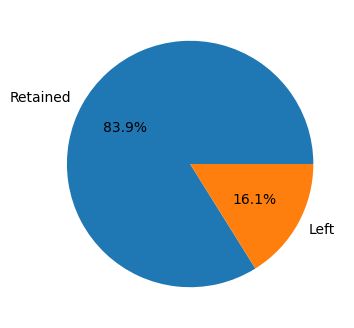

In [746]:

plt.pie(merged_df1["Attrition"].value_counts(normalize=True),labels = ("Retained", "Left"), autopct='%1.1f%%')
plt.show()

Data is imbalanced

In [747]:
# Convert target variable to binary (0 = No, 1 = Yes)

merged_df1['Attrition_bool'] = merged_df1['Attrition'].apply(lambda x: 1 if x == "Yes" else 0)

In [748]:
merged_df1 = merged_df1.drop(["Attrition"], axis=1)
merged_df1.head()

Age     BusinessTravel              Department  DistanceFromHome  \
0   51      Travel_Rarely                   Sales                 6   
1   31  Travel_Frequently  Research & Development                10   
2   32  Travel_Frequently  Research & Development                17   
3   38         Non-Travel  Research & Development                 2   
4   32      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences           1  Female         1   
1          1  Life Sciences           2  Female         1   
2          4          Other           3    Male         4   
3          5  Life Sciences           4    Male         3   
4          1        Medical           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   
3                 11                 3               13.0   
4                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  avg_work_hours  std_work_hours  num_absent_days  \
0                     0        7.373651        0.283224               29   
1                     4        7.718969        0.313351               25   
2                     3        7.013240        0.311551               19   
3                     5        7.193678        0.284133               26   
4                     4        8.006175        0.300656               16   

   num_full_days  num_half_days  JobInvolvement  PerformanceRating  \
0              0            232               3                  3   
1             42            194               2                  4   
2              0            242               3                  3   
3              0            235               2                  3   
4            115            130               3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Attrition_bool  
0                      3.0              4.0              2.0               0  
1                      3.0              2.0              4.0               1  
2                      2.0              2.0              1.0               0  
3                      4.0              4.0              3.0               0  
4                      4.0              1.0              3.0               0

In [749]:
numerical_cols = merged_df1.select_dtypes(include=['float64','int64']).columns

numerical_cols

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'avg_work_hours', 'std_work_hours', 'num_absent_days', 'num_full_days',
       'num_half_days', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'Attrition_bool'],
      dtype='object')

In [750]:
numerical_cols = list(numerical_cols)
numerical_cols.remove("Attrition_bool")

In [751]:
categorical_cols = merged_df1.select_dtypes(include=['object']).columns
categorical_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [752]:
for i in categorical_cols:
    print(f"\nColumn: {i}")
    print(merged_df1[i].value_counts())


Column: BusinessTravel
BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64

Column: Department
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64

Column: EducationField
EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64

Column: Gender
Gender
Male      2646
Female    1764
Name: count, dtype: int64

Column: JobRole
JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: count, dtype: int64

Column: MaritalStatus
MaritalStatus
Married     2019
Single     

#### **3.5. Create dummy variables for categorical variables**

In [753]:
# create dummy variables for categorical columns and drop the first to avoid multicolinearity
merged_df2 = pd.get_dummies(merged_df1, columns=categorical_cols, drop_first=True)
merged_df2.head()

Age  DistanceFromHome  Education  EmployeeID  JobLevel  MonthlyIncome  \
0   51                 6          2           1         1         131160   
1   31                10          1           2         1          41890   
2   32                17          4           3         4         193280   
3   38                 2          5           4         3          83210   
4   32                10          1           5         1          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  avg_work_hours  std_work_hours  num_absent_days  \
0                     0        7.373651        0.283224               29   
1                     4        7.718969        0.313351               25   
2                     3        7.013240        0.311551               19   
3                     5        7.193678        0.284133               26   
4                     4        8.006175        0.300656               16   

   num_full_days  num_half_days  JobInvolvement  PerformanceRating  \
0              0            232               3                  3   
1             42            194               2                  4   
2              0            242               3                  3   
3              0            235               2                  3   
4            115            130               3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Attrition_bool  \
0                      3.0              4.0              2.0               0   
1                      3.0              2.0              4.0               1   
2                      2.0              2.0              1.0               0   
3                      4.0              4.0              3.0               0   
4                      4.0              1.0              3.0               0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                             False                          True   
1                              True                         False   
2                              True                         False   
3                             False                         False   
4                             False                          True   

   Department_Research & Development  Department_Sales  \
0                              False              True   
1                               True             False   
2                               True             False   
3                               True             False   
4                               True             False   

   EducationField_Life Sciences  EducationField_Marketing  \
0                          True                     False   
1                          True                     False   
2                         False                     False   
3                          True                     False   
4                         False                     False   

   EducationField_Medical  EducationField_Other  \
0                   False                 False   
1                   False                 False   
2

In [754]:
# Convert only boolean columns to integers
bool_cols = merged_df2.select_dtypes(include='bool').columns
merged_df2[bool_cols] = merged_df2[bool_cols].astype(int)
merged_df2.head()

Age  DistanceFromHome  Education  EmployeeID  JobLevel  MonthlyIncome  \
0   51                 6          2           1         1         131160   
1   31                10          1           2         1          41890   
2   32                17          4           3         4         193280   
3   38                 2          5           4         3          83210   
4   32                10          1           5         1          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  avg_work_hours  std_work_hours  num_absent_days  \
0                     0        7.373651        0.283224               29   
1                     4        7.718969        0.313351               25   
2                     3        7.013240        0.311551               19   
3                     5        7.193678        0.284133               26   
4                     4        8.006175        0.300656               16   

   num_full_days  num_half_days  JobInvolvement  PerformanceRating  \
0              0            232               3                  3   
1             42            194               2                  4   
2              0            242               3                  3   
3              0            235               2                  3   
4            115            130               3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Attrition_bool  \
0                      3.0              4.0              2.0               0   
1                      3.0              2.0              4.0               1   
2                      2.0              2.0              1.0               0   
3                      4.0              4.0              3.0               0   
4                      4.0              1.0              3.0               0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 1                             0   
3                                 0                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2

In [755]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   DistanceFromHome                   4410 non-null   int64  
 2   Education                          4410 non-null   int64  
 3   EmployeeID                         4410 non-null   int64  
 4   JobLevel                           4410 non-null   int64  
 5   MonthlyIncome                      4410 non-null   int64  
 6   NumCompaniesWorked                 4410 non-null   float64
 7   PercentSalaryHike                  4410 non-null   int64  
 8   StockOptionLevel                   4410 non-null   int64  
 9   TotalWorkingYears                  4410 non-null   float64
 10  TrainingTimesLastYear              4410 non-null   int64  
 11  YearsAtCompany                     4410 non-null   int64

#### 3.6. EDA

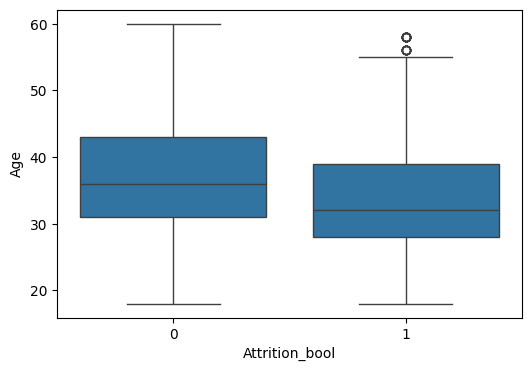

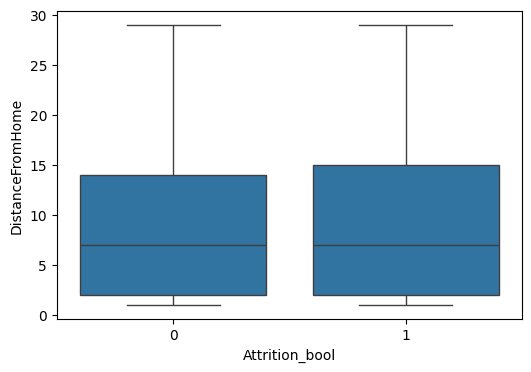

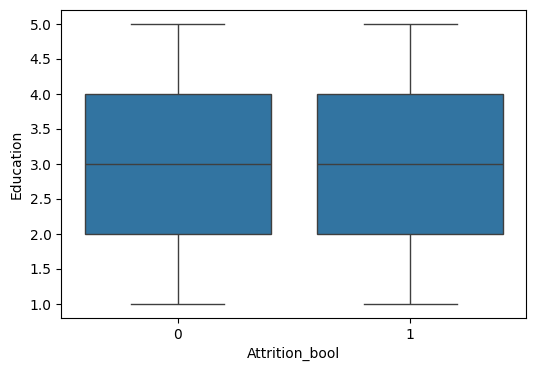

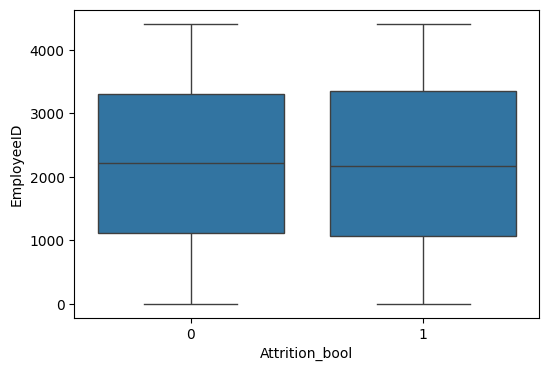

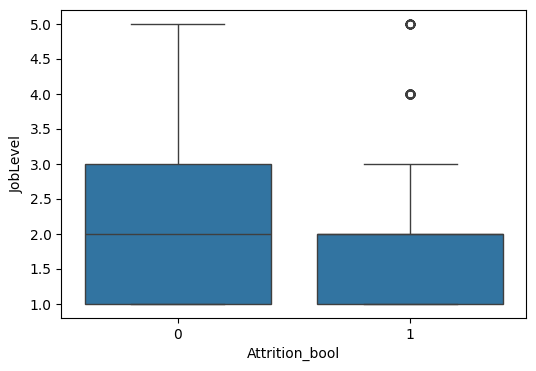

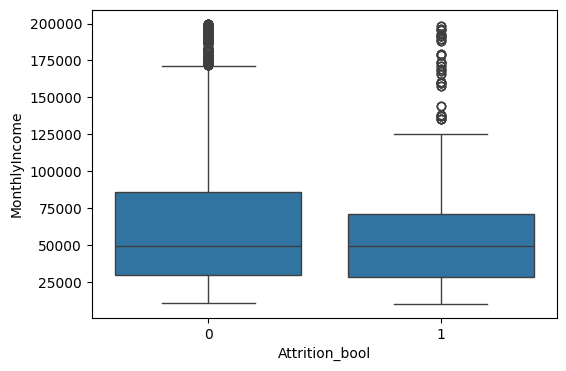

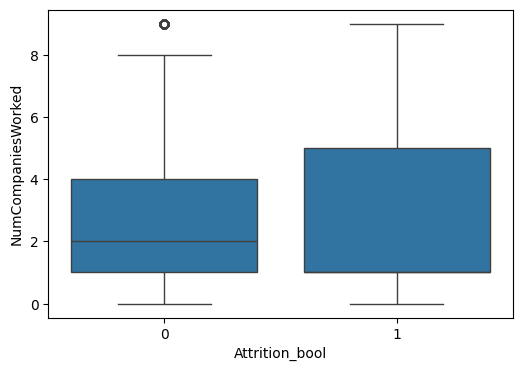

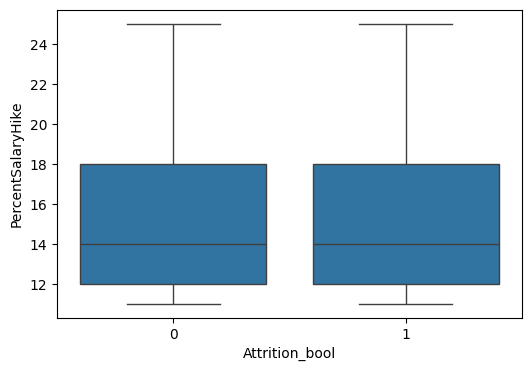

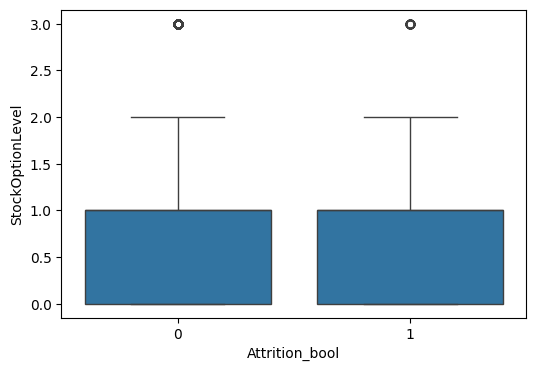

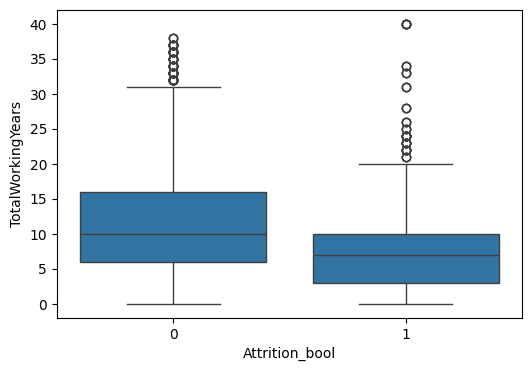

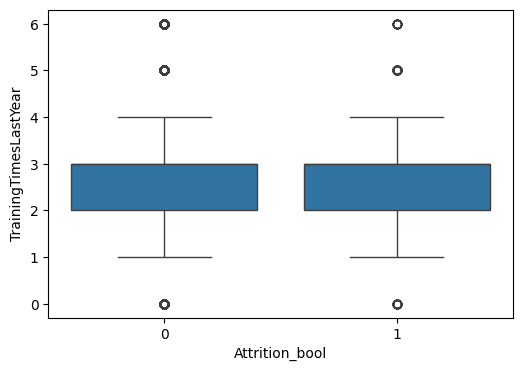

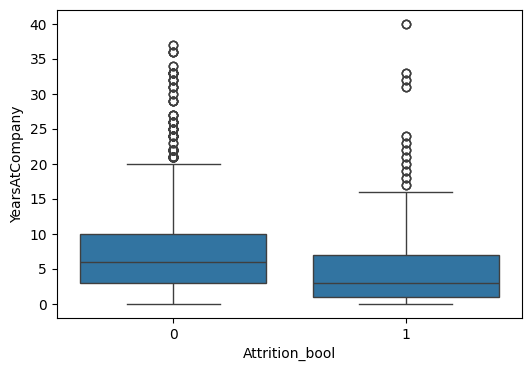

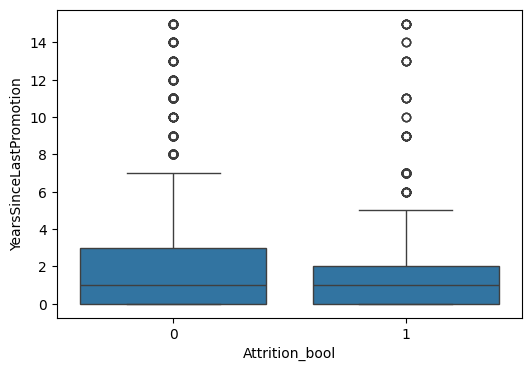

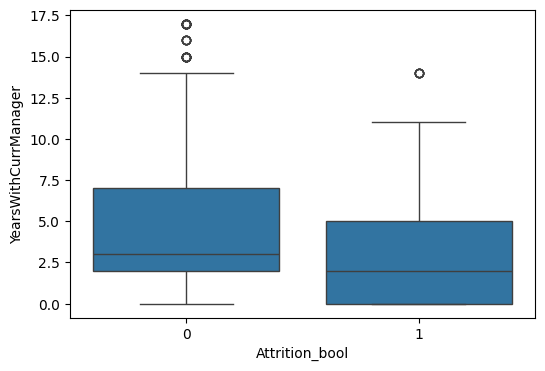

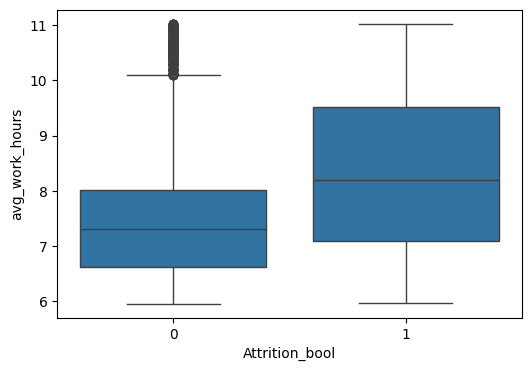

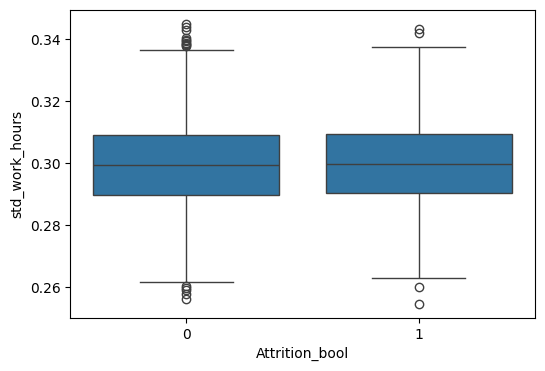

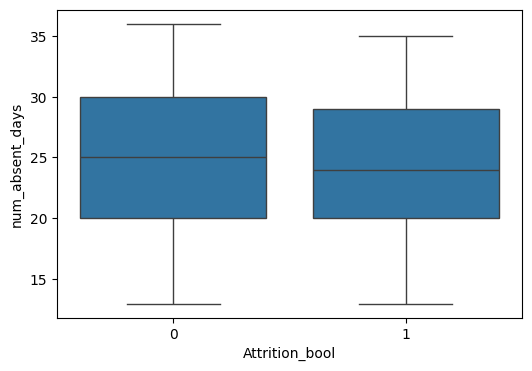

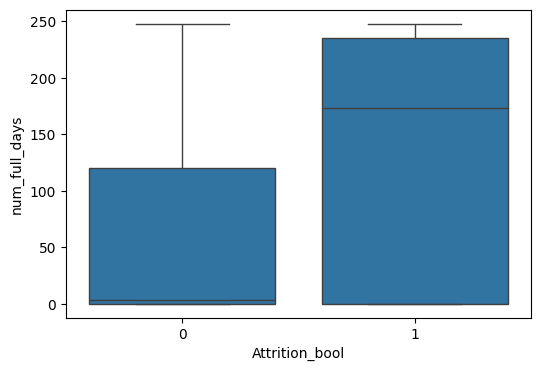

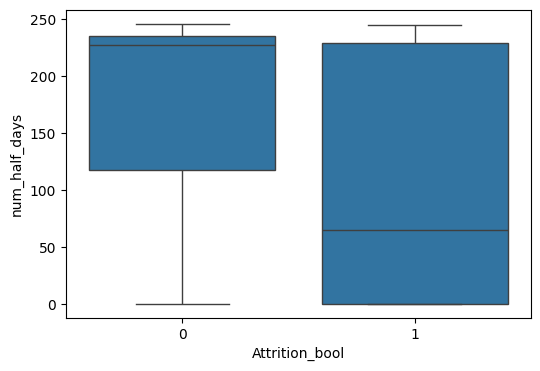

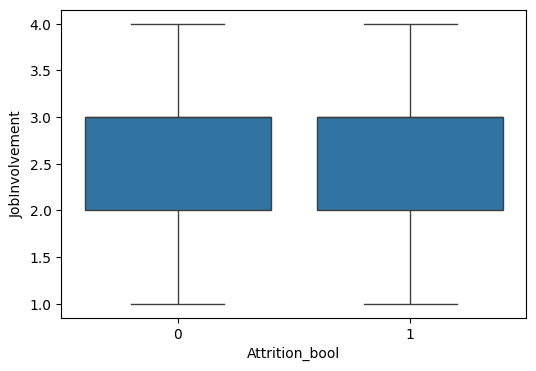

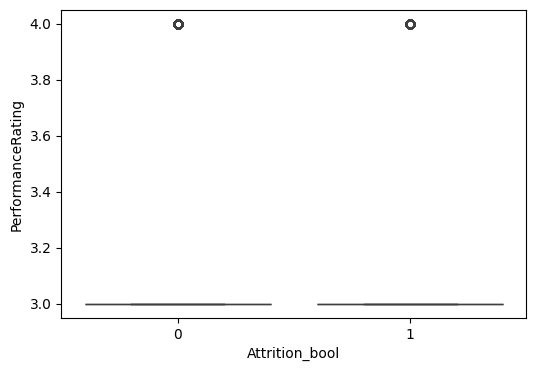

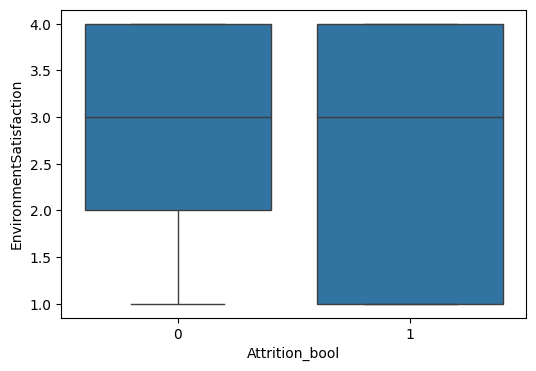

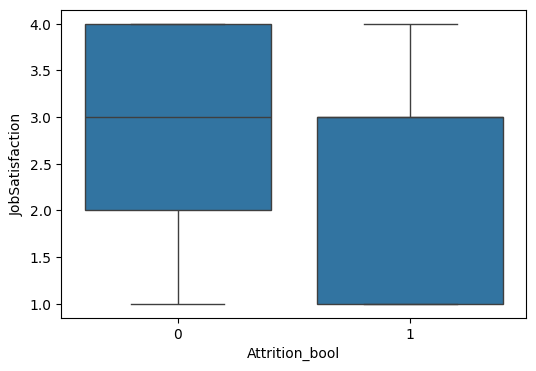

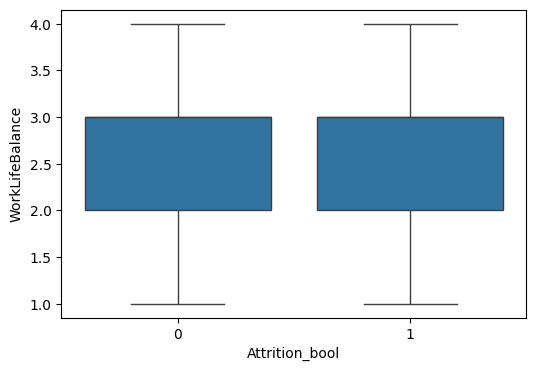

In [756]:
#Comparing for continuous columns and looking for outliers
for i in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x= merged_df2['Attrition_bool'] , y = merged_df2[i] , data = merged_df2)
    plt.show()

In [757]:
merged_df2["MonthlyIncome"].describe()

count      4410.000000
mean      65029.312925
std       47068.888559
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83800.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64

In [758]:
percentiles = [0.10, 0.25, 0.5, 0.75, 0.80, 0.85, 0.90]
merged_df2["MonthlyIncome"].quantile(percentiles)

0.10     23176.0
0.25     29110.0
0.50     49190.0
0.75     83800.0
0.80     98600.0
0.85    109320.0
0.90    137756.0
Name: MonthlyIncome, dtype: float64

In [759]:
q1 = merged_df2['MonthlyIncome'].quantile(0.25)
q3 = merged_df2['MonthlyIncome'].quantile(0.80)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr


merged_df2['MonthlyIncome_capped'] = merged_df2['MonthlyIncome'].clip(lower=lower_limit, upper=upper_limit)

In [760]:
merged_df2 = merged_df2.drop('MonthlyIncome', axis =1)

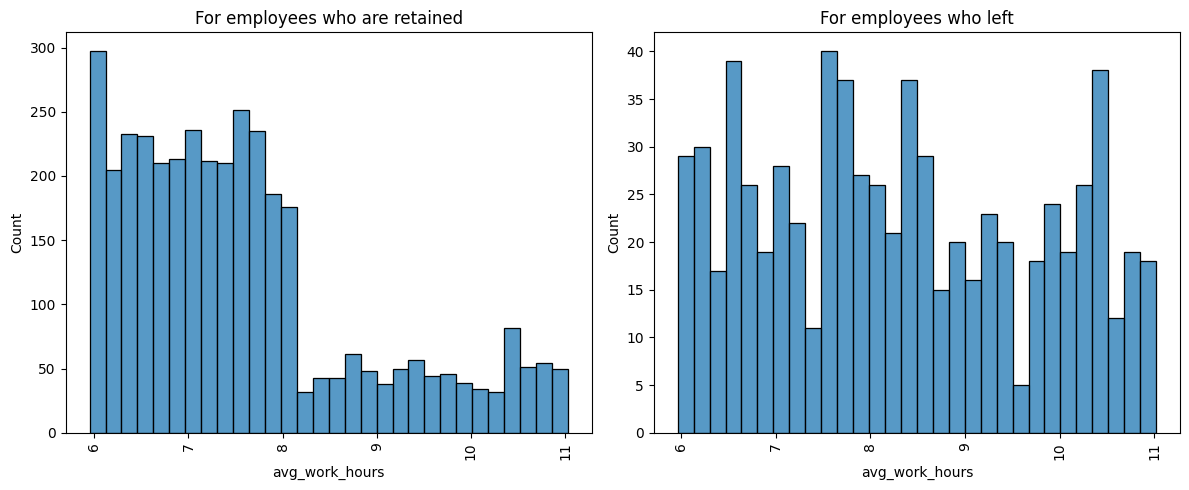

In [761]:
plt.figure(figsize=(12, 5))

# Plot for employees who are retained (Attrition == 0)
plt.subplot(1, 2, 1)
sns.histplot(data=merged_df2[merged_df2['Attrition_bool'] == 0], x="avg_work_hours", bins=30, kde=False)
plt.title("For employees who are retained")
plt.xticks(rotation=90)

# Plot for employees who left (Attrition == 1)
plt.subplot(1, 2, 2)
sns.histplot(data=merged_df2[merged_df2['Attrition_bool'] == 1], x="avg_work_hours", bins=30, kde=False)
plt.title("For employees who left")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

There are many employees who left while working 8–10+ hours per day. –possilbe reasons being burnout, overwork, or job dissatisfaction. Very few employees working for more than 8 hours are still a part of the company.

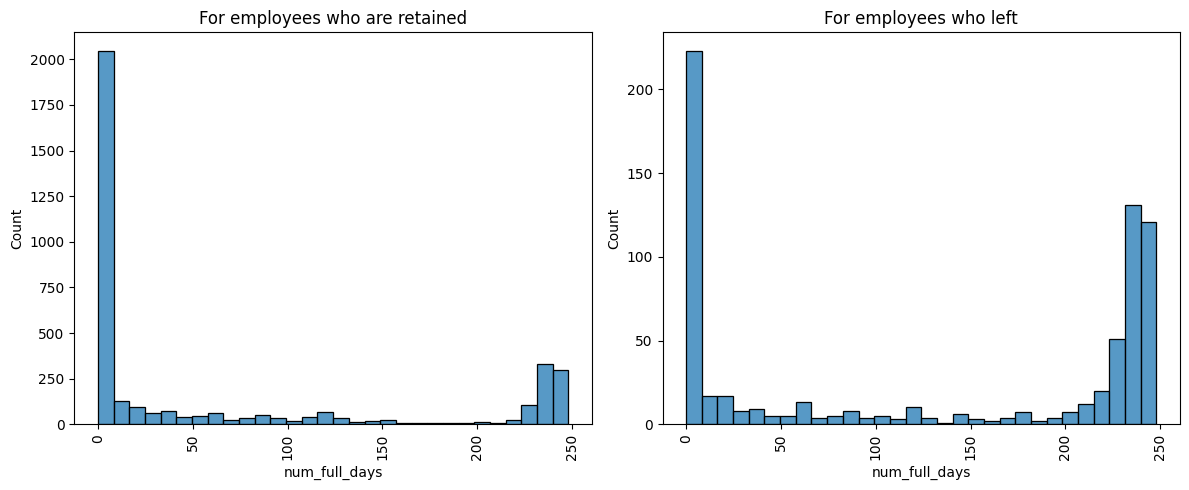

In [762]:
plt.figure(figsize=(12, 5))

# Plot for employees who are retained (Attrition == 0)
plt.subplot(1, 2, 1)
sns.histplot(data=merged_df2[merged_df2['Attrition_bool'] == 0], x="num_full_days", bins=30, kde=False)
plt.title("For employees who are retained")
plt.xticks(rotation=90)

# Plot for employees who left (Attrition == 1)
plt.subplot(1, 2, 2)
sns.histplot(data=merged_df2[merged_df2['Attrition_bool'] == 1], x="num_full_days", bins=30, kde=False)
plt.title("For employees who left")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

High number of full-day workers left the company possibly due to burn-out. Others left due to very low engagement or absenteeism

In [763]:
numerical_cols = merged_df2.select_dtypes(include=['float64','int64']).columns

numerical_cols

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'avg_work_hours',
       'std_work_hours', 'num_absent_days', 'num_full_days', 'num_half_days',
       'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'Attrition_bool',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Rese

In [764]:
numerical_cols = list(numerical_cols)
numerical_cols.remove("Attrition_bool")

#### 3.7. Looking for Corelations

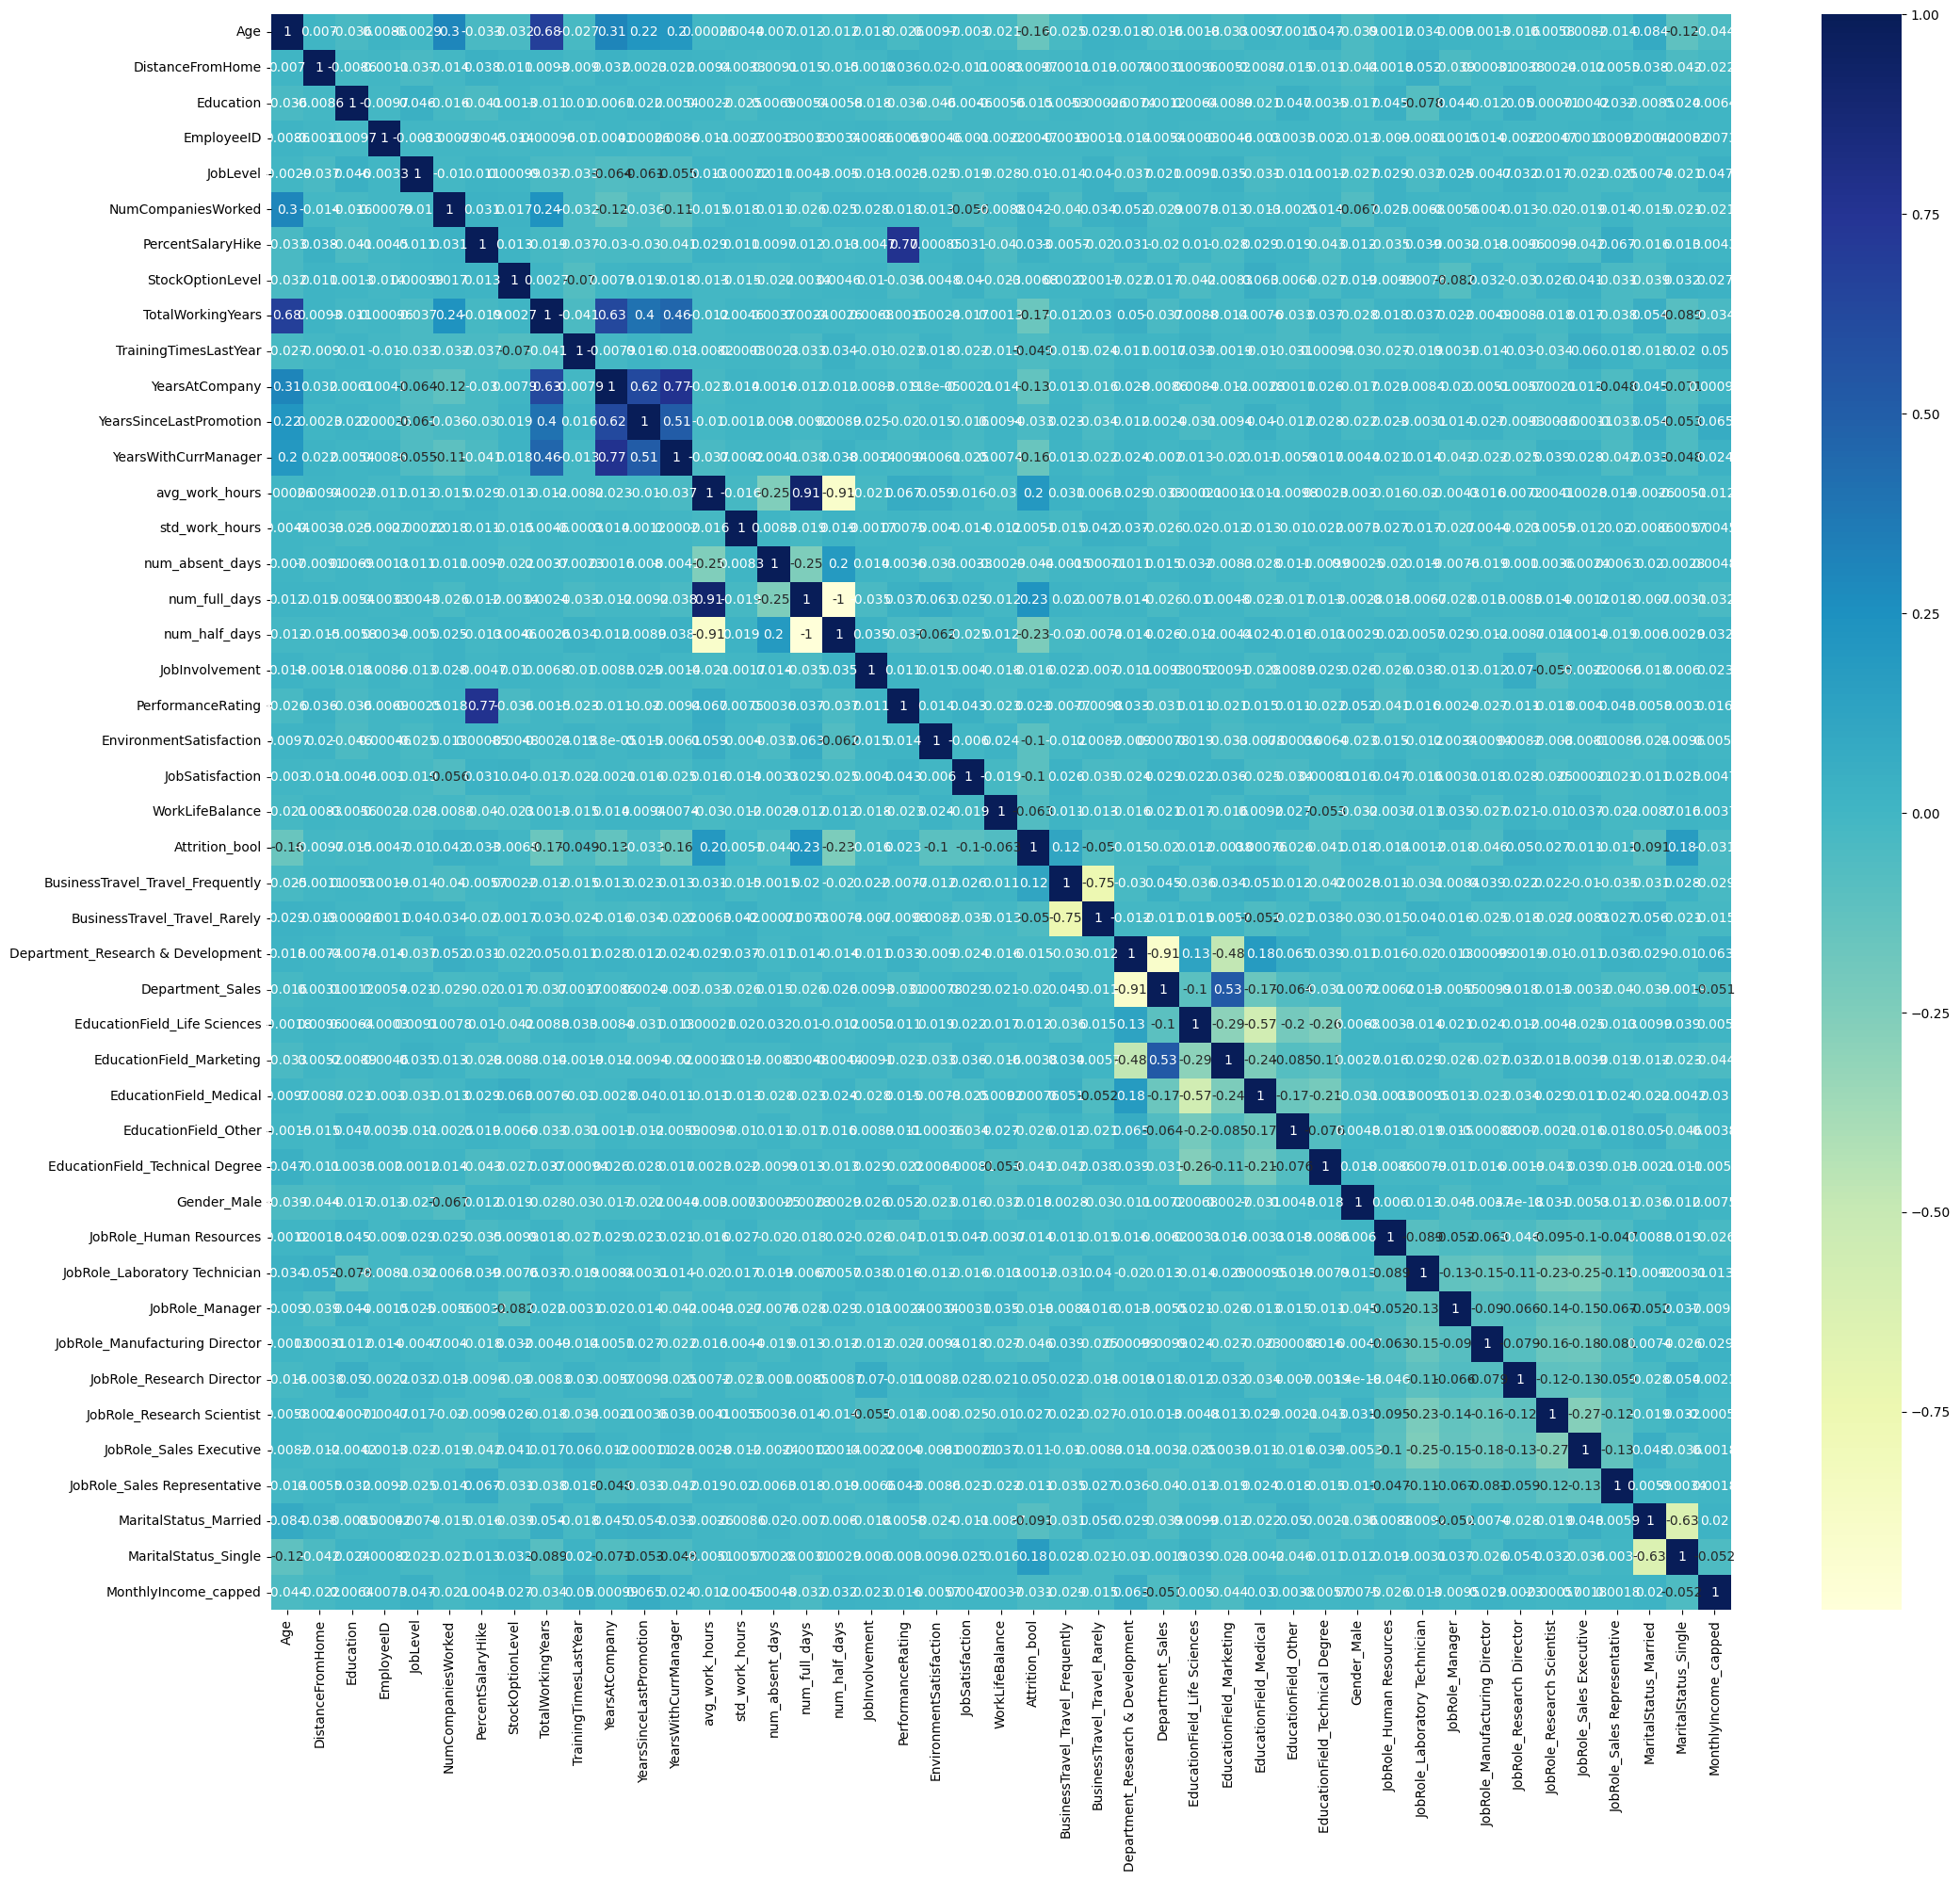

In [765]:
# Checking the correlation between the variables

plt.figure(figsize = (25,22))
sns.heatmap(merged_df2.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [766]:
# If we find high corelation between features we drop them

corr = merged_df2.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

TotalWorkingYears             Age                                  0.680340
YearsAtCompany                TotalWorkingYears                    0.626737
YearsSinceLastPromotion       YearsAtCompany                       0.618409
YearsWithCurrManager          YearsAtCompany                       0.769212
num_full_days                 avg_work_hours                       0.914366
num_half_days                 avg_work_hours                      -0.911715
                              num_full_days                       -0.998543
PerformanceRating             PercentSalaryHike                    0.773550
BusinessTravel_Travel_Rarely  BusinessTravel_Travel_Frequently    -0.753092
Department_Sales              Department_Research & Development   -0.906818
MaritalStatus_Single          MaritalStatus_Married               -0.629981
dtype: float64

YearsatCompany and YearsWithCurrManager have high correlation.

Also TotalWorkingYears and YearsAtCompany and YearsSinceLastPromotion have high correlation.

these features will be removed using RFE ahead

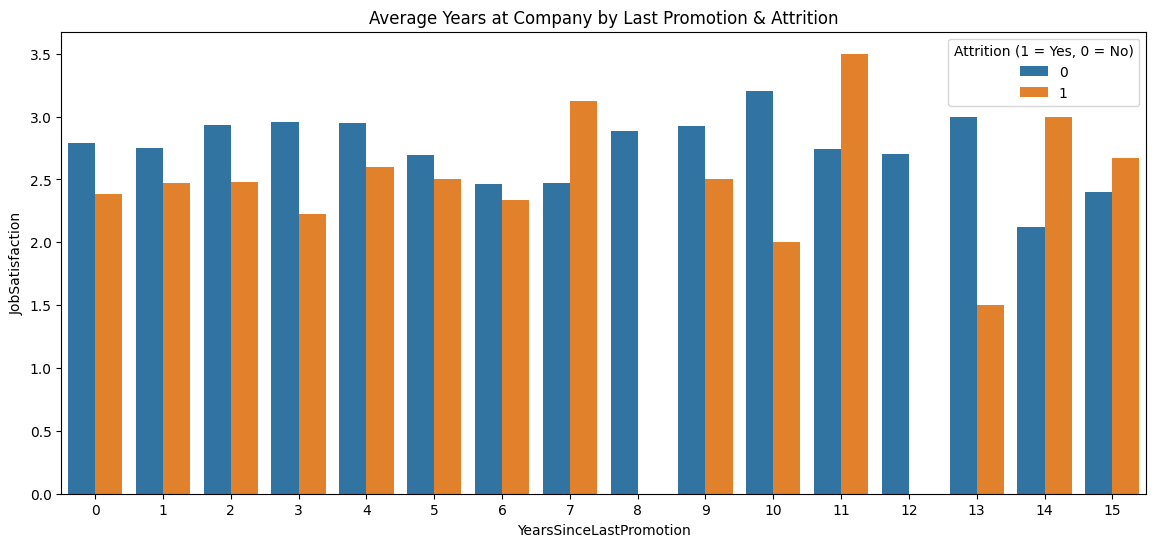

In [767]:

# Lets check the relation between YearsSinceLastPromotion and YearsAtCompany

plt.figure(figsize=(14,6))

sns.barplot(
    data=merged_df2,
    x='YearsSinceLastPromotion',
    y='JobSatisfaction',
    hue='Attrition_bool',
    ci = None
)

plt.title("Average Years at Company by Last Promotion & Attrition")
plt.legend(title="Attrition (1 = Yes, 0 = No)")
plt.show()

Years 3, 10, and 13 show risk of dissatisfaction leading to attrition.

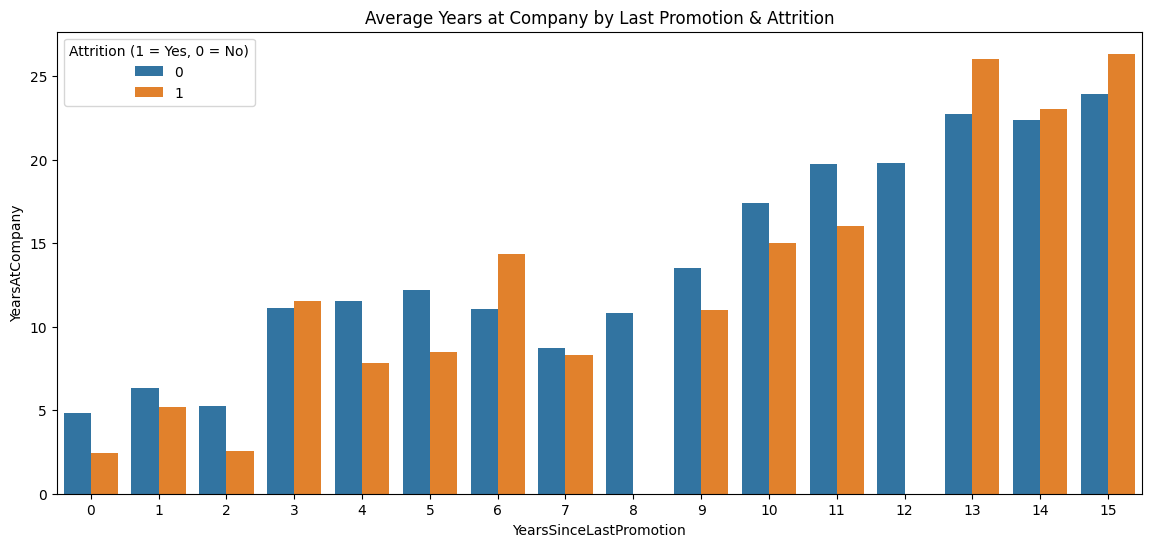

In [768]:
# Lets check the relation between YearsSinceLastPromotion and YearsAtCompany

plt.figure(figsize=(14,6))

sns.barplot(
    data=merged_df2,
    x='YearsSinceLastPromotion',
    y='YearsAtCompany',
    hue='Attrition_bool',
    ci = None
)

plt.title("Average Years at Company by Last Promotion & Attrition")
plt.legend(title="Attrition (1 = Yes, 0 = No)")
plt.show()

There's a clear upward trend in YearsAtCompany as YearsSinceLastPromotion increases — employees who haven’t been promoted in a long time have been with the company longer.

YearsSinceLastPromotion = 13 to 15, show the highest company tenure (~26 years) — meaning long-tenured employees are also choosing to leave, possibly due to stagnation.


we see attrition is more for people

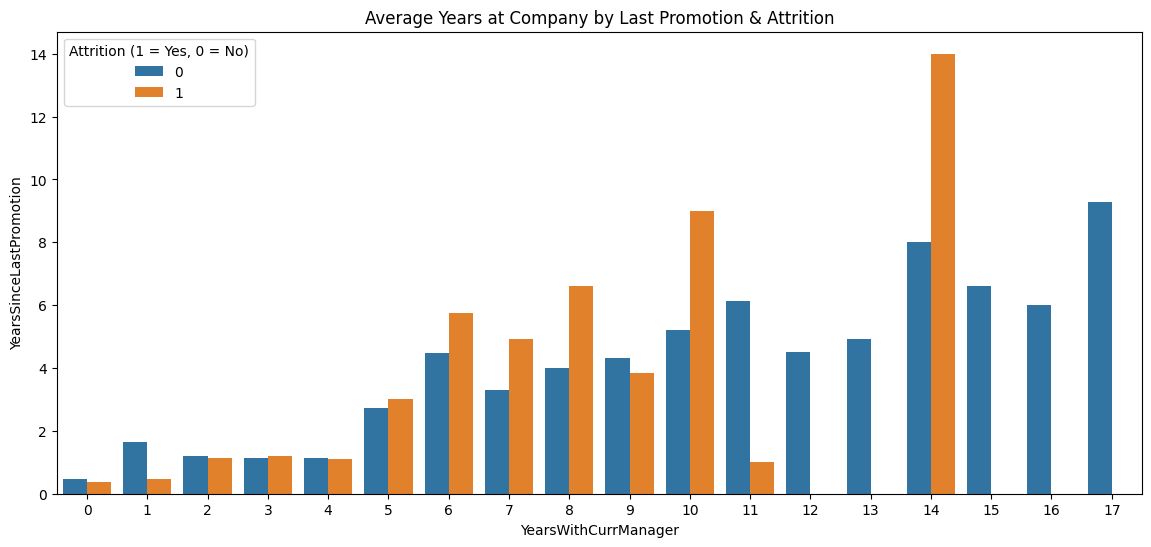

In [769]:
# Lets check the relation between YearsSinceLastPromotion and YearsAtCompany

plt.figure(figsize=(14,6))

sns.barplot(
    data=merged_df2,
    x='YearsWithCurrManager',
    y='YearsSinceLastPromotion',
    hue='Attrition_bool',
    ci = None
)

plt.title("Average Years at Company by Last Promotion & Attrition")
plt.legend(title="Attrition (1 = Yes, 0 = No)")
plt.show()

We see attrition is more for employees working for around 5-10 years under a manager and havent been promoted in 5-10 years.

### **4. Data Preparation - Train - Test split**

In [770]:
# Splitting the data into Training and Test sets

from sklearn.model_selection import train_test_split

# Assigning feature variable to X
X = merged_df2.drop("Attrition_bool", axis=1)

# Assigning target variable to y
y = merged_df2["Attrition_bool"]

# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, test_size=0.3, random_state=100)

### **5. Feature Scaling**

In [771]:
# Rescaling the features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Fit and transform train set
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform test set
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [772]:
# Summary statistics of standardized variables

round(X_train.describe(), 2)

Age  DistanceFromHome  Education  EmployeeID  JobLevel  \
count  3087.00           3087.00    3087.00     3087.00   3087.00   
mean      0.45              0.30       0.48        0.50      0.26   
std       0.22              0.29       0.26        0.29      0.27   
min       0.00              0.00       0.00        0.00      0.00   
25%       0.29              0.04       0.25        0.25      0.00   
50%       0.43              0.21       0.50        0.50      0.25   
75%       0.57              0.46       0.75        0.75      0.50   
max       1.00              1.00       1.00        1.00      1.00   

       NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
count             3087.00            3087.00           3087.00   
mean                 0.30               0.30              0.26   
std                  0.28               0.26              0.28   
min                  0.00               0.00              0.00   
25%                  0.11               0.07              0.00   
50%                  0.22               0.21              0.33   
75%                  0.44               0.50              0.33   
max                  1.00               1.00              1.00   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count            3087.00                3087.00         3087.00   
mean                0.28                   0.47            0.17   
std                 0.19                   0.22            0.15   
min                 0.00                   0.00            0.00   
25%                 0.15                   0.33            0.08   
50%                 0.25                   0.50            0.12   
75%                 0.38                   0.50            0.25   
max                 1.00                   1.00            1.00   

       YearsSinceLastPromotion  YearsWithCurrManager  avg_work_hours  \
count                  3087.00               3087.00         3087.00   
mean                      0.15                  0.24            0.35   
std                       0.21                  0.21            0.26   
min                       0.00                  0.00            0.00   
25%                       0.00                  0.12            0.14   
50%                       0.07                  0.18            0.29   
75%                       0.20                  0.41            0.48   
max                       1.00                  1.00            1.00   

       std_work_hours  num_absent_days  num_full_days  num_half_days  \
count         3087.00          3087.00        3087.00        3087.00   
mean             0.50             0.51           0.31           0.65   
std              0.15             0.24           0.41           0.40   
min              0.00             0.00           0.00           0.00   
25%              0.39             0.30           0.00           0.09   
50%              0.50             0.52           0.02           0.92   
75%              0.60             0.74           0.86           0.96   
max              1.00             1.00           1.00           1.00   

       JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
count         3087.00            3087.00                  3087.00   
mean             0.57               0.15                     0.58   
std              0.24               0.36                     0.36   
min              0.00               0.00                     0.00   
25%              0.33               0.00                     0.33   
50%              0.67               0.00                     0.67   
75%              0.67               0.00                     1.00   
max              1.00               1.00                     1.00   

       JobSatisfaction  WorkLifeBalance  BusinessTravel_Travel_Frequently  \
count          3087.00          3087.00                           3087.00   
mean              0.57             0.59                              0.19   
std               0.37             0.23

### **6. Handling Class Imbalance (using SMOTE technique)**



In [773]:
pip install imbalanced-learn

In [774]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

In [775]:
print("Dimension of X_train_smt Shape:", X_train_smt.shape)
print("Dimension of y_train_smt Shape:", y_train_smt.shape)

Dimension of X_train_smt Shape: (5148, 44)
Dimension of y_train_smt Shape: (5148,)


In [776]:
y_train_smt.value_counts(normalize =True)

Attrition_bool
0    0.5
1    0.5
Name: proportion, dtype: float64

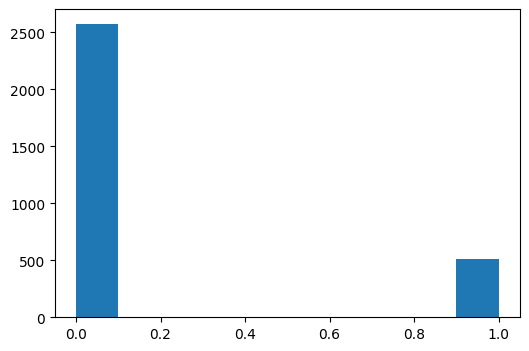

In [777]:
plt.hist(y_train)
plt.show()

### **7.Model Building - Logistic Regression**

#### 7.1 MODEL 1: Logistic Regression

In [778]:
import statsmodels.api as sm

In [779]:
# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM
log_m1 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt)), family = sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_bool   No. Observations:                 5148
Model:                            GLM   Df Residuals:                     5104
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2441.0
Date:                Thu, 17 Jul 2025   Deviance:                       4882.1
Time:                        09:03:23   Pearson chi2:                 5.95e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3546
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.5516      0.310      8.243      0.000       1.945       3.158
Age                                  -1.8338      0.245     -7.483      0.000      -2.314      -1.353
DistanceFromHome                      0.0944      0.132      0.714      0.475      -0.165       0.354
Education                            -0.2733      0.156     -1.751      0.080      -0.579       0.033
EmployeeID                           -0.1914      0.135     -1.417      0.157      -0.456       0.073
JobLevel                             -0.2076      0.142     -1.458      0.145      -0.487       0.071
NumCompaniesWorked                    1.7470      0.152     11.478      0.000       1.449       2.045
PercentSalaryHike                     0.3183      0.232      1.370      0.171      -0.137       0.774
StockOptionLevel                     -0.6220      0.139     -4.468      0.000      -0.895      -0.349
TotalWorkingYears                    -2.9949      0.401     -7.460      0.000      -3.782      -2.208
TrainingTimesLastYear                -1.2689      0.189     -6.730      0.000      -1.638      -0.899
YearsAtCompany                        1.7553      0.572      3.066      0.002       0.633       2.877
YearsSinceLastPromotion               2.0097      0.254      7.897      0.000       1.511       2.508
YearsWithCurrManager                 -3.2412      0.325     -9.966      0.000      -3.879      -2.604
avg_work_hours                       -1.0573      0.342     -3.089      0.002      -1.728      -0.386
std_work_hours                        0.4288      0.259      1.657      0.098      -0.079       0.936
num_absent_days                      -0.0218      0.161     -0.136      0.892      -0.336       0.293
num_full_days                         2.5152      0.221     11.371      0.000       2.082       2.949
num_half_days                         0.0388      0.160      0.243      0.808      -0.275       0.352
JobInvolvement                        0.1402      0.155      0.902      0.367      -0.164       0.445
PerformanceRating                     0.0070      0.165      0.042      0.966      -0.317       0.331
EnvironmentSatisfaction              -1.2130      0.103    -11.831      0.000      -1.414      -1.012
JobSatisfaction                      -1.2797      0.105    -12.207      0.000      -1.485      -1.074
WorkLifeBalance                      -1.1591      0.154     -7.505      0.000      -1.462      -0.856
BusinessTravel_Travel_Frequently      1.9318      0.165     11.721      0.000       1.609       2.255
BusinessTravel_Travel_Rarely          1.0828      0.152      7.123      0.000       0.785       1.381
Department_Research & Development    -0.9879      0.234     -4.228      0.000      -1.446      -0.530
Department_Sales       

#### 7.2 Using RFE for Feature selection

In [780]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create LR object
logreg = LogisticRegression()

# Running RFE with 10 variables as output
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train_smt,y_train_smt)


# Printing the boolean results
list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_))

[('Age', np.True_, np.int64(1)),
 ('DistanceFromHome', np.False_, np.int64(23)),
 ('Education', np.False_, np.int64(15)),
 ('EmployeeID', np.False_, np.int64(17)),
 ('JobLevel', np.False_, np.int64(16)),
 ('NumCompaniesWorked', np.True_, np.int64(1)),
 ('PercentSalaryHike', np.False_, np.int64(12)),
 ('StockOptionLevel', np.False_, np.int64(4)),
 ('TotalWorkingYears', np.True_, np.int64(1)),
 ('TrainingTimesLastYear', np.True_, np.int64(1)),
 ('YearsAtCompany', np.True_, np.int64(1)),
 ('YearsSinceLastPromotion', np.True_, np.int64(1)),
 ('YearsWithCurrManager', np.True_, np.int64(1)),
 ('avg_work_hours', np.True_, np.int64(1)),
 ('std_work_hours', np.False_, np.int64(8)),
 ('num_absent_days', np.False_, np.int64(21)),
 ('num_full_days', np.True_, np.int64(1)),
 ('num_half_days', np.True_, np.int64(1)),
 ('JobInvolvement', np.False_, np.int64(19)),
 ('PerformanceRating', np.False_, np.int64(25)),
 ('EnvironmentSatisfaction', np.True_, np.int64(1)),
 ('JobSatisfaction', np.True_, np.int

In [781]:
# Features selected after RFE elimination

rfe_col = X_train_smt.columns[rfe.support_]
rfe_col

Index(['Age', 'NumCompaniesWorked', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'avg_work_hours', 'num_full_days',
       'num_half_days', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Other', 'JobRole_Sales Executive',
       'MaritalStatus_Single'],
      dtype='object')

 #### 7.3 MODEL 2: Logistic regression after RFE selecetion

In [782]:
# Build model with RFE selected features and Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_smt[rfe_col])

log_m2 = sm.GLM(y_train_smt,X_train_sm, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_bool   No. Observations:                 5148
Model:                            GLM   Df Residuals:                     5127
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.5
Date:                Thu, 17 Jul 2025   Deviance:                       5010.9
Time:                        09:03:26   Pearson chi2:                 6.30e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3383
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.5213      1.657      1.522      0.128      -0.726       5.769
Age                                  -1.7971      0.232     -7.753      0.000      -2.251      -1.343
NumCompaniesWorked                    1.6950      0.147     11.494      0.000       1.406       1.984
TotalWorkingYears                    -3.1620      0.395     -8.015      0.000      -3.935      -2.389
TrainingTimesLastYear                -1.1836      0.182     -6.499      0.000      -1.541      -0.827
YearsAtCompany                        1.7131      0.560      3.059      0.002       0.615       2.811
YearsSinceLastPromotion               1.9071      0.246      7.737      0.000       1.424       2.390
YearsWithCurrManager                 -3.0704      0.314     -9.773      0.000      -3.686      -2.455
avg_work_hours                       -0.8527      0.326     -2.617      0.009      -1.491      -0.214
num_full_days                         1.9353      1.728      1.120      0.263      -1.451       5.322
num_half_days                        -0.3993      1.715     -0.233      0.816      -3.761       2.963
EnvironmentSatisfaction              -1.1530      0.100    -11.554      0.000      -1.349      -0.957
JobSatisfaction                      -1.2951      0.101    -12.803      0.000      -1.493      -1.097
WorkLifeBalance                      -0.9265      0.148     -6.244      0.000      -1.217      -0.636
BusinessTravel_Travel_Frequently      1.9316      0.163     11.838      0.000       1.612       2.251
BusinessTravel_Travel_Rarely          1.1262      0.150      7.483      0.000       0.831       1.421
Department_Research & Development    -1.1148      0.162     -6.874      0.000      -1.433      -0.797
Department_Sales                     -1.2654      0.169     -7.499      0.000      -1.596      -0.935
EducationField_Other                 -0.6845      0.172     -3.984      0.000      -1.021      -0.348
JobRole_Sales Executive               0.6718      0.084      7.972      0.000       0.507       0.837
MaritalStatus_Single                  1.1303      0.074     15.215      0.000       0.985       1.276
=====================================================================================================
"""

In [783]:
# Getting the predicted values on the train set
# Reshaping the predicted probabilities so that it returns an array of Conversion_Probabilities.
y_train_smt_pred = res.predict(X_train_sm).values.reshape(-1)


# Creating a dataframe with the "actual" attrition and the predicted probabilities
y_train_smt_pred_final = pd.DataFrame({'Attrition':y_train_smt.values, 'Attrition_Prob':y_train_smt_pred})
#y_train_smt_pred_final['Emp_Id'] = y_train_smt.index
y_train_smt_pred_final.head()

Attrition  Attrition_Prob
0          0        0.281513
1          1        0.837267
2          0        0.019755
3          0        0.895067
4          0        0.092141

In [784]:
# Creating new column 'predicted' with 1 if Attrition_Prob > 0.5 else 0

y_train_smt_pred_final['Predicted'] = y_train_smt_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_smt_pred_final.head()

Attrition  Attrition_Prob  Predicted
0          0        0.281513          0
1          1        0.837267          1
2          0        0.019755          0
3          0        0.895067          1
4          0        0.092141          0

In [785]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Predicted )
print(confusion)

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Predicted)}')

[[1956  618]
 [ 535 2039]]
Accuracy : 0.776029526029526


##### 7.3.2 Checking VIFs

In [786]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [787]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_col].values, i) for i in range(X_train_smt[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8                       num_full_days  37.09
9                       num_half_days  32.41
7                      avg_work_hours  19.87
15  Department_Research & Development  12.76
14       BusinessTravel_Travel_Rarely  10.07
2                   TotalWorkingYears   9.45
0                                 Age   9.22
4                      YearsAtCompany   8.97
12                    WorkLifeBalance   7.24
3               TrainingTimesLastYear   6.69
16                   Department_Sales   6.17
6                YearsWithCurrManager   5.87
13   BusinessTravel_Travel_Frequently   4.01
10            EnvironmentSatisfaction   3.34
11                    JobSatisfaction   3.21
1                  NumCompaniesWorked   2.89
5             YearsSinceLastPromotion   2.47
19               MaritalStatus_Single   1.81
18            JobRole_Sales Executive   1.38
17               EducationField_Other   1.08

VIF	Measures multicollinearity — how much the feature is linearly related to other features

p-value	Measures statistical significance — how strongly this feature impacts the target variable (Attrition)

Although the features "num_full_days" and "num_half_days" have high VIF, and p-value. so we will drop these and run the model again.

In [788]:
# Removing the "Age" column and checking the performance of the model
rfe_col = rfe_col.drop(["num_full_days","num_half_days"], 1)

#### 7.5 MODEL 3 - Logistic regression after removing "num_full_days" and "num_half_days" features

In [789]:
# Build new model
X_train_sm = sm.add_constant(X_train_smt[rfe_col])
log_m3 = sm.GLM(y_train_smt,X_train_sm, family = sm.families.Binomial())
res = log_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_bool   No. Observations:                 5148
Model:                            GLM   Df Residuals:                     5129
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.2
Date:                Thu, 17 Jul 2025   Deviance:                       5134.4
Time:                        09:03:26   Pearson chi2:                 6.18e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3222
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.7570      0.275      6.391      0.000       1.218       2.296
Age                                  -1.8489      0.229     -8.074      0.000      -2.298      -1.400
NumCompaniesWorked                    1.6700      0.146     11.441      0.000       1.384       1.956
TotalWorkingYears                    -2.9037      0.387     -7.509      0.000      -3.662      -2.146
TrainingTimesLastYear                -1.3055      0.178     -7.338      0.000      -1.654      -0.957
YearsAtCompany                        1.7855      0.551      3.241      0.001       0.706       2.865
YearsSinceLastPromotion               1.9220      0.242      7.933      0.000       1.447       2.397
YearsWithCurrManager                 -3.2045      0.310    -10.328      0.000      -3.813      -2.596
avg_work_hours                        2.4460      0.132     18.473      0.000       2.187       2.706
EnvironmentSatisfaction              -1.0962      0.098    -11.185      0.000      -1.288      -0.904
JobSatisfaction                      -1.2597      0.099    -12.689      0.000      -1.454      -1.065
WorkLifeBalance                      -0.8496      0.146     -5.809      0.000      -1.136      -0.563
BusinessTravel_Travel_Frequently      1.8852      0.160     11.782      0.000       1.572       2.199
BusinessTravel_Travel_Rarely          1.1187      0.148      7.566      0.000       0.829       1.408
Department_Research & Development    -1.1418      0.160     -7.148      0.000      -1.455      -0.829
Department_Sales                     -1.3058      0.166     -7.843      0.000      -1.632      -0.980
EducationField_Other                 -0.6694      0.166     -4.028      0.000      -0.995      -0.344
JobRole_Sales Executive               0.6242      0.083      7.547      0.000       0.462       0.786
MaritalStatus_Single                  1.1121      0.073     15.232      0.000       0.969       1.255
=====================================================================================================
"""

In [790]:
# Getting the predicted values on the train set
# Reshaping the predicted probabilities so that it returns an array of Conversion_Probabilities.
y_train_smt_pred = res.predict(X_train_sm).values.reshape(-1)


# Creating a dataframe with the "actual" attrition and the predicted probabilities
y_train_smt_pred_final = pd.DataFrame({'Attrition':y_train_smt.values, 'Attrition_Prob':y_train_smt_pred})
#y_train_smt_pred_final['Emp_Id'] = y_train_smt.index
y_train_smt_pred_final.head()

Attrition  Attrition_Prob
0          0        0.345519
1          1        0.884163
2          0        0.023577
3          0        0.808847
4          0        0.082103

In [791]:
# Creating new column 'predicted' with 1 if Attrition_Prob > 0.5 else 0

y_train_smt_pred_final['Predicted'] = y_train_smt_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_smt_pred_final.head()

Attrition  Attrition_Prob  Predicted
0          0        0.345519          0
1          1        0.884163          1
2          0        0.023577          0
3          0        0.808847          1
4          0        0.082103          0

In [792]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Predicted )
print(confusion)

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Predicted)}')

[[1940  634]
 [ 567 2007]]
Accuracy : 0.7667055167055167


##### 7.5.2. Checking *VIFs*

In [793]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_col].values, i) for i in range(X_train_smt[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                   TotalWorkingYears  9.41
4                      YearsAtCompany  8.95
13  Department_Research & Development  8.85
0                                 Age  8.80
12       BusinessTravel_Travel_Rarely  7.54
10                    WorkLifeBalance  6.18
6                YearsWithCurrManager  5.83
3               TrainingTimesLastYear  5.78
14                   Department_Sales  4.46
11   BusinessTravel_Travel_Frequently  3.27
8             EnvironmentSatisfaction  3.23
9                     JobSatisfaction  3.11
7                      avg_work_hours  3.05
1                  NumCompaniesWorked  2.85
5             YearsSinceLastPromotion  2.46
17               MaritalStatus_Single  1.75
16            JobRole_Sales Executive  1.38
15               EducationField_Other  1.07

some features here have high VIFs (greater than 5) but have significant p-values so wont be removing them further.

#### 7.6 Performance Matrix

#### 7.6.1 Accuracy, Sensitivity, Specificity

In [794]:
#Calculation of Final Model characteristics.

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [795]:
# sensitivity (true positive rate) = No.of actual yeses predicted / Total no.of actual Yeses

sensitivity = float(TP / float(TP+FN))
sensitivity

0.7797202797202797

In [796]:
# Specificity = No.of actual No's predicted / Total no.of actual No's

specificity = float(TN / float(TN+FP))
specificity

0.7536907536907537

In [797]:
# false postive rate - predicting Attrition when employee has not left
print(FP/ float(TN+FP))

0.2463092463092463


In [798]:
# positive predictive value(Precision) = total no.of positives correctly predicted/ Total no of positives predicted

print (TP / float(TP+FP))

0.7599394168875426


In [799]:
# Negative predictive value = total no.of negatives correctly predicted/ Total no of negatives predicted


print (TN / float(TN+ FN))

0.7738332668528122


Model here has accuracy of 76% and specificity of 75.3% and sensitivity of 77.9%  .

Checking if the sensitivity can be increased further by changing the cutoff point

Plotting ROC

In [800]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [801]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Attrition_Prob, drop_intermediate = False )

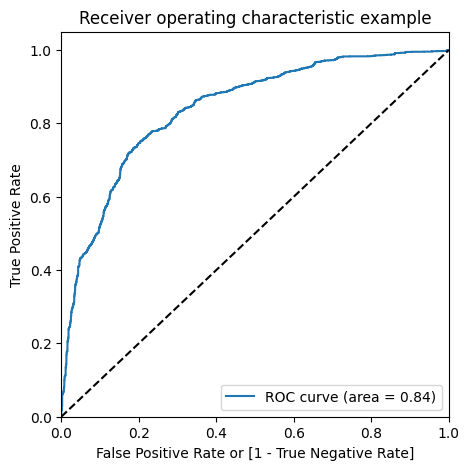

In [802]:
draw_roc(y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Attrition_Prob)

Optimal cutoff point (threshhold) for sensitivity specificity curve

In [803]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_smt_pred_final[i]= y_train_smt_pred_final.Attrition_Prob.map(lambda x: 1 if x > i else 0)
y_train_smt_pred_final.head()

Attrition  Attrition_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.345519          0    1    1    1    1    0    0    0   
1          1        0.884163          1    1    1    1    1    1    1    1   
2          0        0.023577          0    1    0    0    0    0    0    0   
3          0        0.808847          1    1    1    1    1    1    1    1   
4          0        0.082103          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [804]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smt_pred_final.Attrition, y_train_smt_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.599262  0.982906  0.215618
0.2   0.2  0.668026  0.944833  0.391220
0.3   0.3  0.717366  0.903652  0.531080
0.4   0.4  0.754468  0.865190  0.643745
0.5   0.5  0.766706  0.779720  0.753691
0.6   0.6  0.767094  0.702409  0.831779
0.7   0.7  0.713481  0.530303  0.896659
0.8   0.8  0.662393  0.362082  0.962704
0.9   0.9  0.565268  0.143745  0.986791


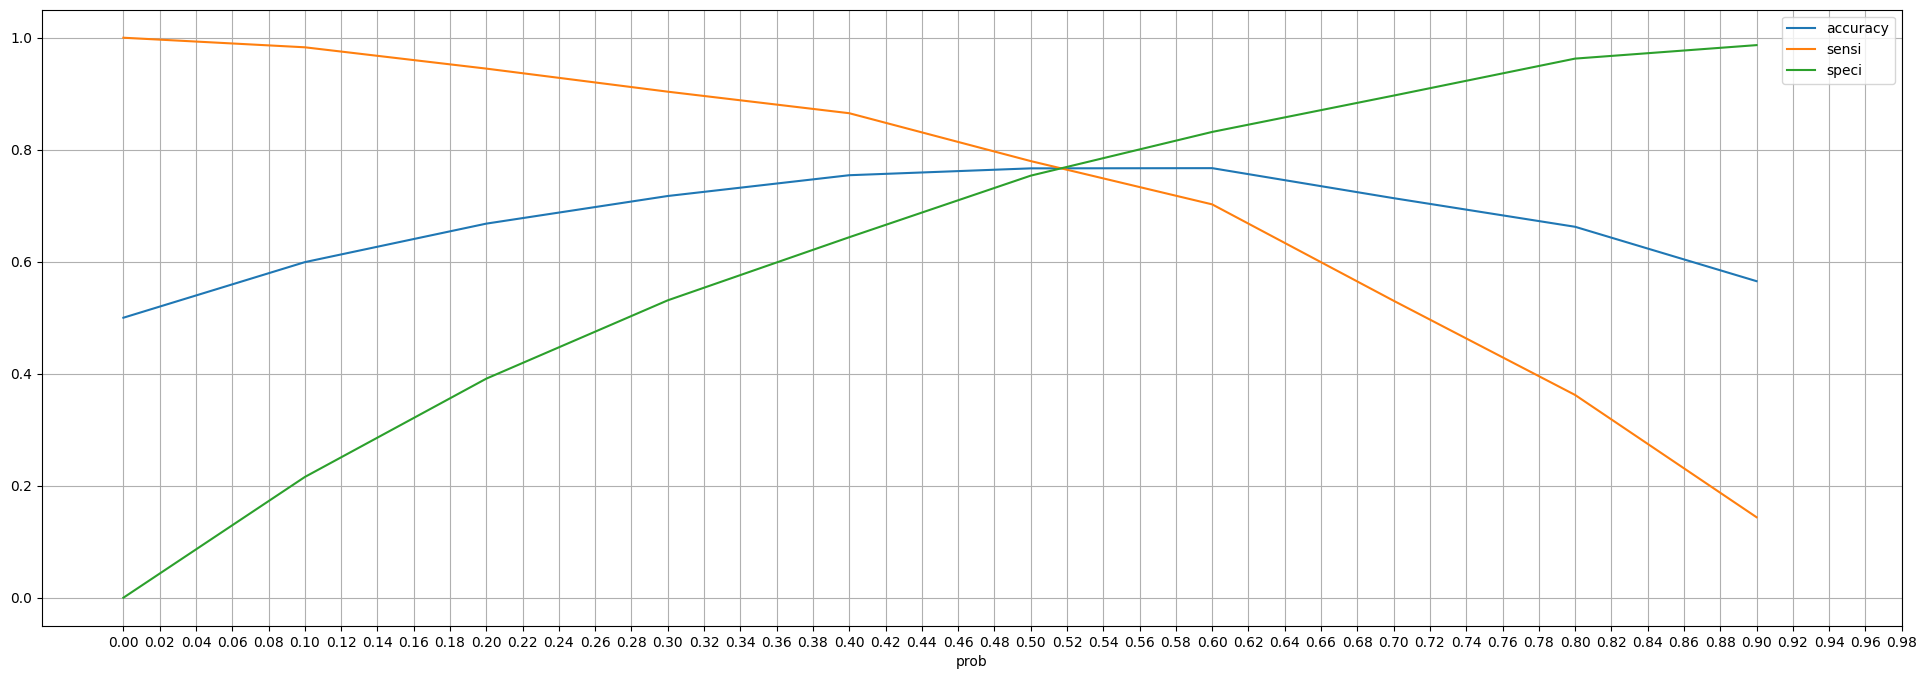

In [805]:
# Plot accuracy sensitivity and specificity for various probabilities.
plt.figure
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],xticks=np.arange(0,1,0.02), figsize=(24,8))
plt.grid()
plt.show()

0.45 cutoff value seems optimal for our Model

Evaluating sensitivity specificity on Training set for 0.52 cutoff

In [806]:
# Creating new column 'predicted' with 1 if Attrition_Prob > 0.45 else 0

y_train_smt_pred_final['Predicted'] = y_train_smt_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.52 else 0)

y_train_smt_pred_final.head()

Attrition  Attrition_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.345519          0    1    1    1    1    0    0    0   
1          1        0.884163          1    1    1    1    1    1    1    1   
2          0        0.023577          0    1    0    0    0    0    0    0   
3          0        0.808847          1    1    1    1    1    1    1    1   
4          0        0.082103          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [807]:
#Let's check the overall accuracy.

# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Predicted )
print(confusion2)



[[1991  583]
 [ 591 1983]]


Accuracy has only incresed from 76 to 77% after changing cutoff value

In [808]:
#Confusion Matrix - Calculating all parameters.

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [809]:
# Accuracy
print("Accuracy for Train set:-",metrics.accuracy_score(y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Predicted))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy for Train set:- 0.771950271950272
Sensitivity:- 0.7703962703962703
Specificity:- 0.7735042735042735


#### 7.6 Predicting sensitivity specificity on test data with 0.52 cutoff

In [810]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Attrition':y_test.values, 'Attrition_Prob':y_test_pred})
y_test_pred_final['Predicted'] = y_test_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.52 else 0)

y_test_pred_final.head()

Attrition  Attrition_Prob  Predicted
4020          1        0.773206          1
1697          0        0.336246          0
2481          0        0.064266          0
1039          1        0.710235          1
93            0        0.249153          0

In [811]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Attrition, y_test_pred_final.Predicted )
print(confusion)

print()

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy for Test set:-",metrics.accuracy_score(y_test_pred_final.Attrition, y_test_pred_final.Predicted))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[872 253]
 [ 67 131]]

Accuracy for Test set:- 0.7581254724111867
Sensitivity:- 0.6616161616161617
Specificity:- 0.7751111111111111


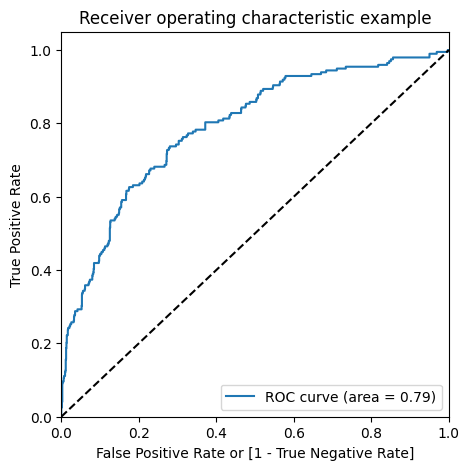

In [812]:
# ROC curve for Test set
draw_roc(y_test_pred_final.Attrition, y_test_pred_final.Attrition_Prob)

AUC score for Train data 0.84 is and Test data is 0.79

Accuracy for Train set:- 0.771
Sensitivity:- 0.770
Specificity:- 0.773

Accuracy for Test set:- 0.758
Sensitivity:- 0.661
Specificity:- 0.775

#### **7.7 Precision and Recall**

Checking Precision and Recall on training set

In [813]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Predicted)
print(confusion)

print()

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

[[872 253]
 [ 67 131]]



##### Precision
TP / TP + FP

In [814]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

np.float64(0.7727981293842556)

##### Recall
TP / TP + FN

In [815]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

np.float64(0.7703962703962703)

In [816]:
from sklearn.metrics import precision_score, recall_score

In [817]:
precision_score(y_train_smt_pred_final.Attrition , y_train_smt_pred_final.Predicted)

0.7727981293842556

In [818]:
recall_score(y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Predicted)

0.7703962703962703

#### Precision and Recall Trade-off

In [819]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [820]:
# Creating precision recall curve

p, r, thresholds = precision_recall_curve(y_train_smt_pred_final.Attrition, y_train_smt_pred_final.Attrition_Prob)

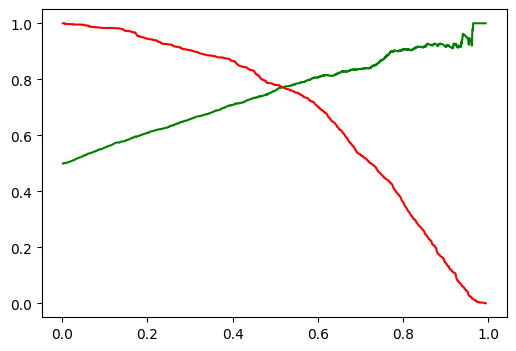

In [821]:
plt.figure(figsize=(6, 4))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

the cutoff value is same for precision recall curve as well being 0.52

#### Predicting on test data with 0.52 cutoff

In [822]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Attrition':y_test.values, 'Attrition_Prob':y_test_pred})
y_test_pred_final['Predicted'] = y_test_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_test_pred_final.head()

Attrition  Attrition_Prob  Predicted
4020          1        0.773206          1
1697          0        0.336246          0
2481          0        0.064266          0
1039          1        0.710235          1
93            0        0.249153          0

In [823]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Attrition, y_test_pred_final.Predicted )
print(confusion)

print()

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy for Test set:-",metrics.accuracy_score(y_test_pred_final.Attrition, y_test_pred_final.Predicted))


[[872 253]
 [ 67 131]]

Accuracy for Test set:- 0.7581254724111867


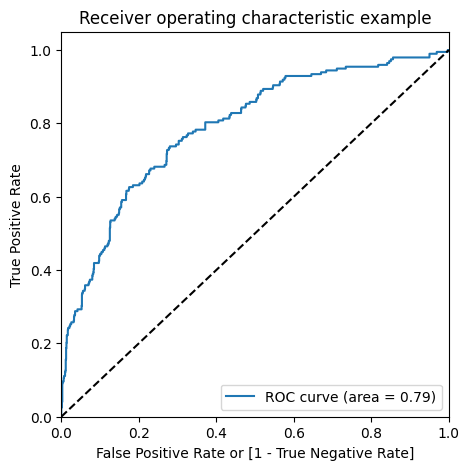

In [824]:
# ROC curve for Test set
draw_roc(y_test_pred_final.Attrition, y_test_pred_final.Attrition_Prob)

In [825]:
precision_score(y_test_pred_final.Attrition, y_test_pred_final.Predicted)

0.3411458333333333

In [826]:
recall_score(y_test_pred_final.Attrition, y_test_pred_final.Predicted)

0.6616161616161617

Observation -  

Train data showing Accuracy - 77.1% , sensitivity - 77.0% , specificity - 77.3% , precision - 77.2 , recall - 77


Test data showing Accuracy - 75.8% , sensitivity - 60.2% , specificity - 77.5% , precision - 34 , recall - 66

###  8.Model Building - Decision Tree

In [827]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [828]:
X_train_smt = (X_train_smt[rfe_col])
dtree.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier()

In [829]:
y_test_pred = dtree.predict(X_test)

In [830]:
metrics.accuracy_score(y_test, y_test_pred)

0.9644746787603931

Plotting the tree using plot_tree

In [831]:
from sklearn.tree import plot_tree

[Text(0.43436096009676733, 0.975, 'x[6] <= 0.118\ngini = 0.5\nsamples = 5148\nvalue = [2574, 2574]'),
 Text(0.1907698851552531, 0.925, 'x[0] <= 0.381\ngini = 0.409\nsamples = 1738\nvalue = [499.0, 1239.0]'),
 Text(0.3125654226260102, 0.95, 'True  '),
 Text(0.09192896639727775, 0.875, 'x[3] <= 0.175\ngini = 0.264\nsamples = 1086\nvalue = [170, 916]'),
 Text(0.06592939174819226, 0.825, 'x[9] <= 0.239\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.06252658443215653, 0.775, 'x[10] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.0591237771161208, 0.725, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.06592939174819226, 0.725, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.06933219906422798, 0.775, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.11792854104636324, 0.825, 'x[7] <= 0.301\ngini = 0.245\nsamples = 1064\nvalue = [152, 912]'),
 Text(0.09676733304976606, 0.775, 'x[9] <= 0.98\ngini = 0.394\nsamples = 415\nvalue = [112, 303]'),
 Text(0.072735006380

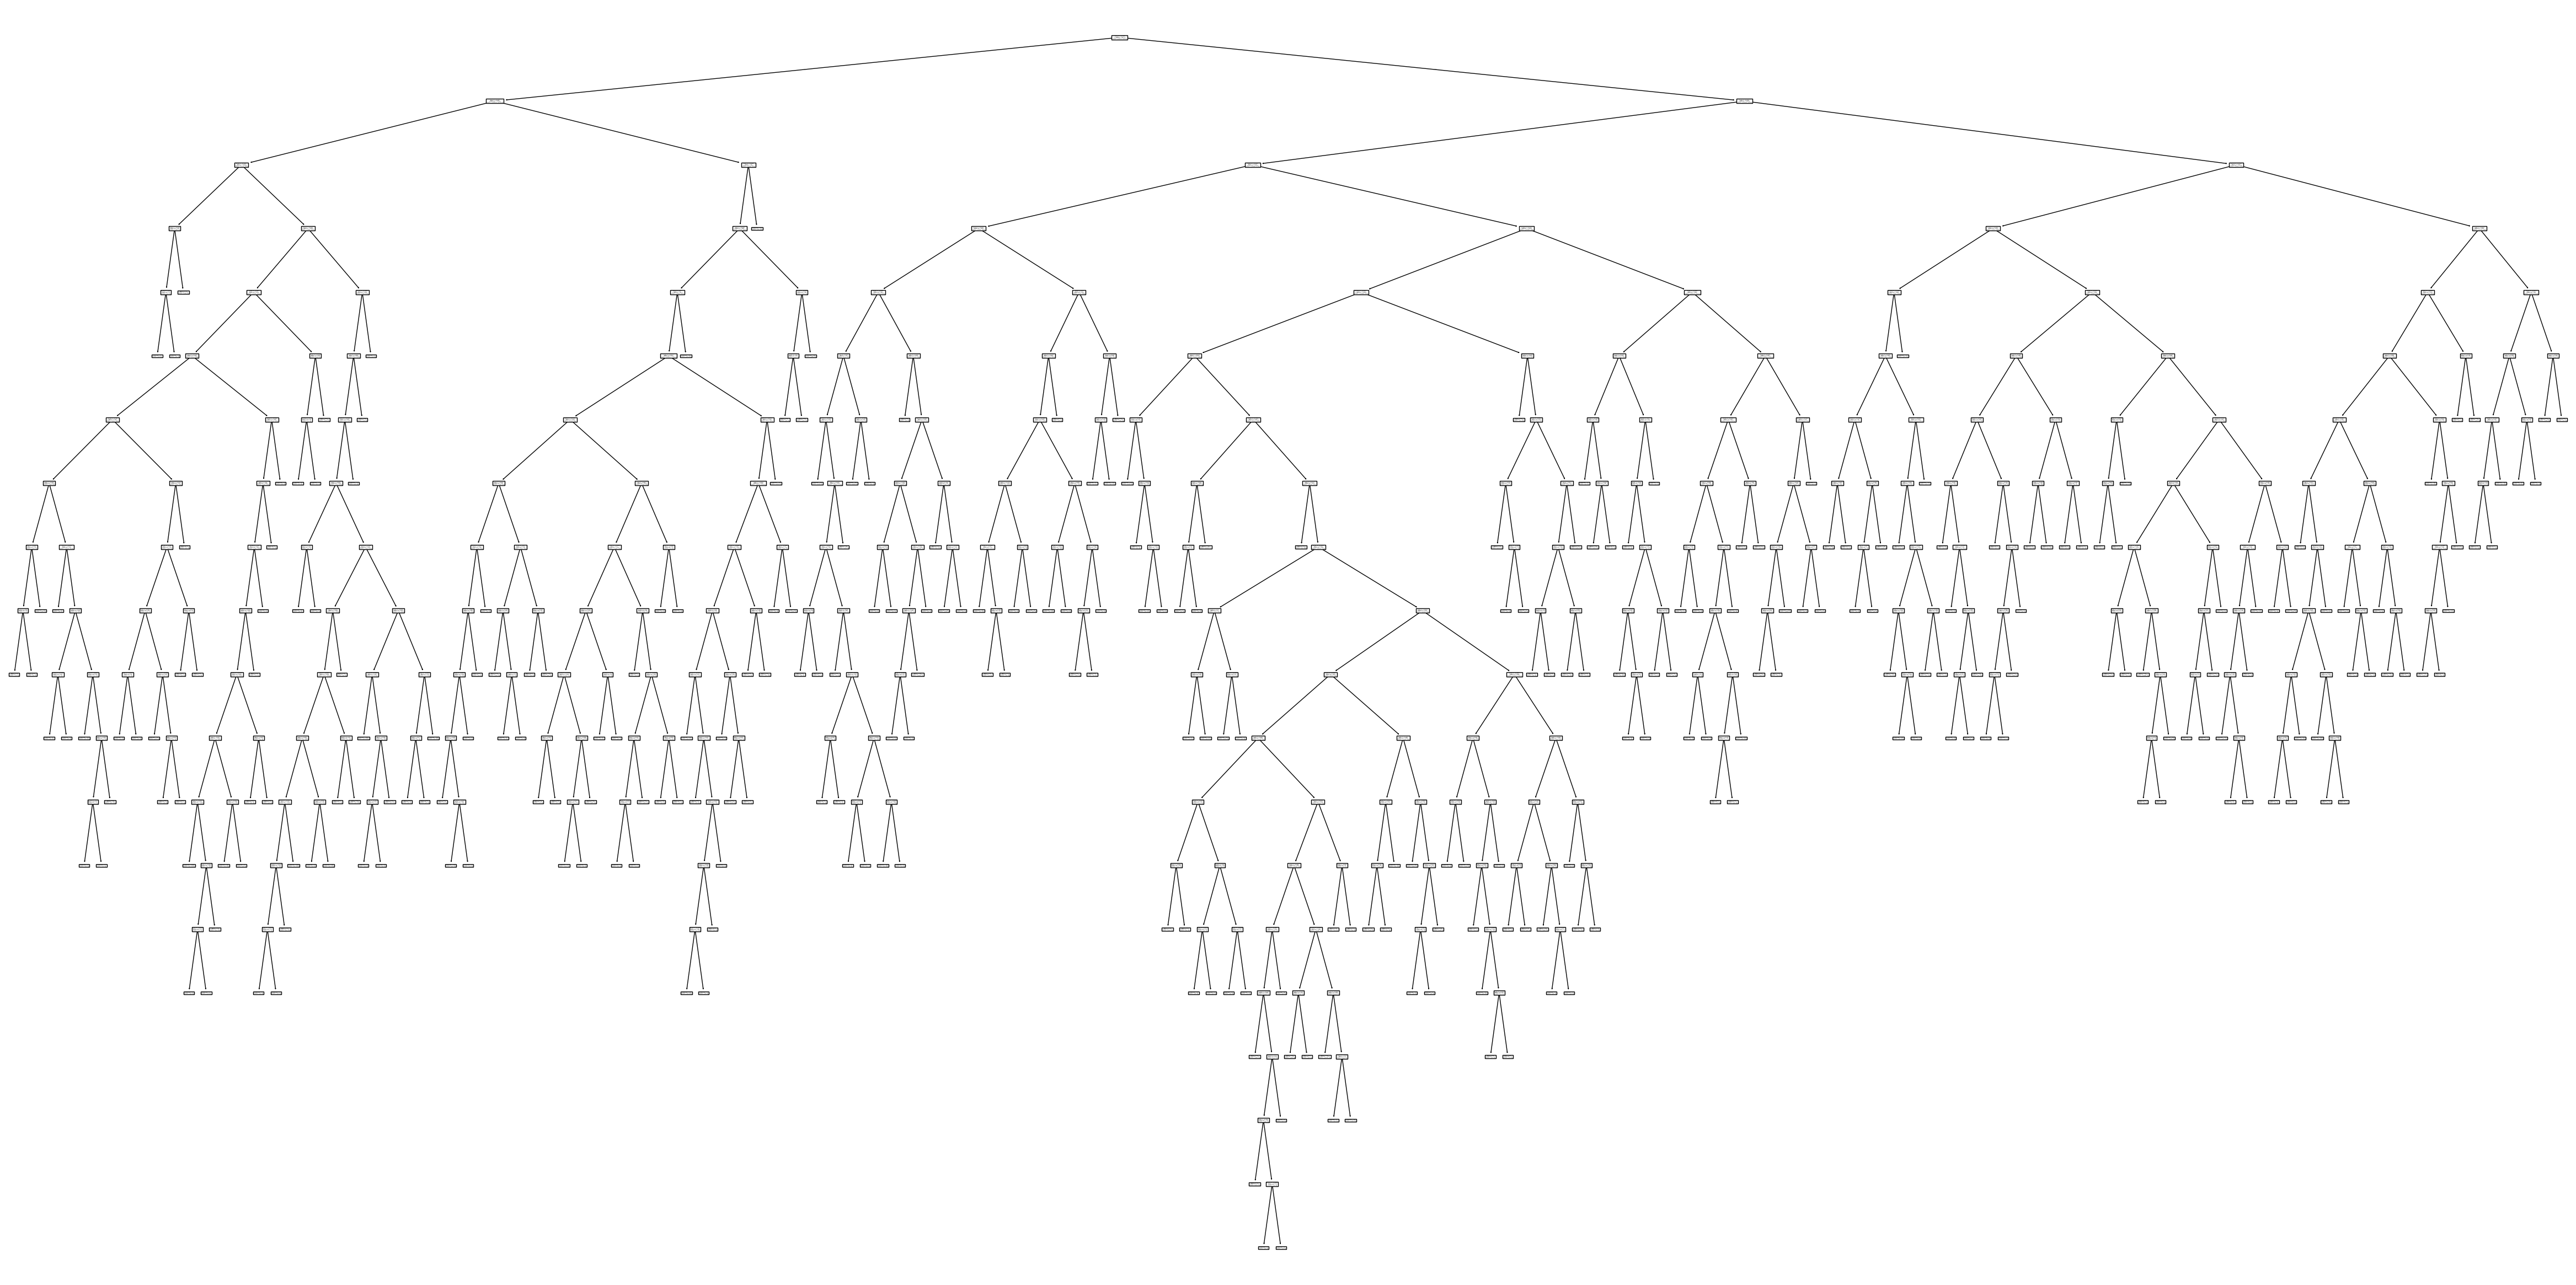

In [832]:
from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 60,30
plot_tree(dtree)

#### 8.1. Hyperparameter tuning

In [833]:
# creating parameter grid

params = {
     'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ["gini", "entropy"]
}

In [834]:
# Instantiate the grid search CV model

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = params,
                           scoring= 'recall',           #grid search will select the model with the highest recall
                           cv = 5,
                           verbose = 1)

In [835]:
# Fit the grid search to the data
X_train_smt = (X_train_smt[rfe_col])
grid_search.fit(X_train_smt,y_train_smt)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='recall', verbose=1)

In [836]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.024151      0.006848         0.006299        0.001424   
1         0.013296      0.000520         0.004025        0.000176   
2         0.013761      0.001449         0.004473        0.000661   
3         0.014111      0.001959         0.004315        0.000351   
4         0.013398      0.000598         0.004184        0.000280   
5         0.013454      0.001000         0.004008        0.000122   
6         0.013327      0.000569         0.003923        0.000061   
7         0.013292      0.000529         0.004090        0.000400   
8         0.013334      0.000944         0.004013        0.000382   
9         0.013095      0.000406         0.004289        0.000700   
10        0.013070      0.000473         0.003856        0.000080   
11        0.013021      0.000513         0.003940        0.000119   
12        0.014725      0.002126         0.004449        0.001050   
13        0.013127      0.000455         0.003907        0.000216   
14        0.014997      0.003010         0.004705        0.000967   
15        0.015013      0.002475         0.005163        0.001363   
16        0.019741      0.000953         0.004266        0.000371   
17        0.019596      0.000915         0.004428        0.000389   
18        0.019571      0.001639         0.004185        0.000144   
19        0.019015      0.000807         0.004077        0.000152   
20        0.018966      0.000964         0.003912        0.000093   
21        0.020921      0.002768         0.004907        0.001146   
22        0.019671      0.000610         0.004272        0.000129   
23        0.019344      0.000751         0.004221        0.000084   
24        0.019031      0.000924         0.004159        0.000111   
25        0.019365      0.000737         0.004763        0.001232   
26        0.019963      0.001343         0.004323        0.000301   
27        0.018999      0.000817         0.004078        0.000062   
28        0.018858      0.000818         0.004096        0.000047   
29        0.018803      0.000754         0.004450        0.001051   
30        0.020657      0.003448         0.004460        0.000588   
31        0.019032      0.001556         0.004357        0.000712   
32        0.030988      0.001458         0.004472        0.000213   
33        0.031688      0.001578         0.004342        0.000164   
34        0.030658      0.000965         0.004596        0.000591   
35        0.030366      0.001427         0.004216        0.000125   
36        0.031532      0.002016         0.004751        0.000971   
37        0.029866      0.000937         0.004142        0.000115   
38        0.037062      0.004793         0.006228        0.001054   
39        0.042899      0.003827         0.006883        0.000736   
40        0.039369      0.001354         0.006249        0.000265   
41        0.041279      0.003305         0.006545        0.000359   
42        0.039069      0.001842         0.006475        0.000130   
43        0.040407      0.002125         0.006538        0.000248   
44        0.036717      0.001712         0.006340        0.000192   
45        0.038445      0.002743         0.006515        0.000405   
46        0.037895      0.003157         0.006904        0.000829   
47        0.037774      0.001903         0.006972        0.000773   
48        0.046958      0.001520         0.006827        0.000435   
49        0.046913      0.001955         0.006846        0.000442   
50        0.034923      0.004099         0.004940        0.001153   
51        0.032926      0.001406         0.004517        0.000206   
52        0.031498      0.001739         0.004320        0.000073   
53        0.031439      0.001682         0.004403        0.000259   
54        0.031410      0.002028         0.004291        0.000079   
55        0.032943      0.002870         0.004434        0.000305   
56        0.029216      0.001504         0.004304        0.000100   
57 

In [837]:
# Printing the optimal sensitivity score and hyperparameters

print("Best recall:-", grid_search.best_score_)
print(grid_search.best_params_)

Best recall:- 0.9568788485512447
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### 8.2. Model with optimal hyperparameters

In [838]:
# model with the best hyperparameters

dt_model = DecisionTreeClassifier(criterion = "entropy",
                                  random_state = 42,
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2)

dt_model.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(criterion='entropy', random_state=42)

#### 8.3. Predicting on the Train set

In [839]:
# Predictions on the train set
y_train_smt_pred = dt_model.predict(X_train_smt)

In [840]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smt, y_train_smt_pred)
print(confusion)

[[2574    0]
 [   0 2574]]


In [841]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [842]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smt, y_train_smt_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Precision
print("Precision:-", TP/float(TP+FP))

# Precision
print("Recall:-", TP /float(TP + FN))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
Precision:- 1.0
Recall:- 1.0


#### 8.4. Prediction on the Test set

In [843]:
# Prediction on the test set
X_test = X_test[rfe_col]
y_test_pred = dt_model.predict(X_test)

In [844]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1093   32]
 [  17  181]]


In [845]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))


# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Precision
print("Precision:-", TP/float(TP+FP))

# Precision
print("Recall:-", TP /float(TP + FN))

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

Accuracy:- 0.9629629629629629
Sensitivity:- 0.9141414141414141
Specificity:- 0.9715555555555555
Precision:- 0.8497652582159625
Recall:- 0.9141414141414141
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1125
           1       0.85      0.91      0.88       198

    accuracy                           0.96      1323
   macro avg       0.92      0.94      0.93      1323
weighted avg       0.96      0.96      0.96      1323



In [846]:
#detemining feature importance according to this model
#dtree_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
dtree_importances = pd.DataFrame  (dt_model.feature_importances_, columns=['gini_importance'],index=X_train_smt.columns)

dtree_importances = dtree_importances.sort_values(by='gini_importance', ascending=False)
dtree_importances

gini_importance
YearsWithCurrManager                      0.189504
avg_work_hours                            0.122423
Age                                       0.118717
JobSatisfaction                           0.076606
EnvironmentSatisfaction                   0.076001
YearsSinceLastPromotion                   0.069276
TotalWorkingYears                         0.065271
WorkLifeBalance                           0.057560
TrainingTimesLastYear                     0.054969
NumCompaniesWorked                        0.049185
MaritalStatus_Single                      0.033282
YearsAtCompany                            0.030292
BusinessTravel_Travel_Frequently          0.015796
BusinessTravel_Travel_Rarely              0.013292
JobRole_Sales Executive                   0.012411
Department_Sales                          0.011344
EducationField_Other                      0.003683
Department_Research & Development         0.000389

Shows that features like

YearsWithCurrManager

avg_work_hours

Age

JobSatisfaction

EnvironmentSatisfaction

YearsSinceLastPromotion

play in important role in detemining Attrition

### 9.Model Building - Random Forest

In [847]:
from sklearn.ensemble import RandomForestClassifier

In [848]:
X_train_smt.shape


(5148, 18)

In [849]:
X_test.shape

(1323, 18)

In [850]:
# Create a base model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train_smt, y_train_smt)

RandomForestClassifier()

In [851]:
# Predict on test data
y_test_pred = rf.predict(X_test)


Evaluate the baseline model

In [852]:
print("Training accuracy:", metrics.accuracy_score(y_test, y_test_pred))


Training accuracy: 0.9886621315192744


#### 9.1. Hyperparameter tuning

In [853]:
params = {
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
}

In [854]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf,
                           param_grid = params,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True,
                            scoring= 'recall')

In [855]:
# Fit the model on train set

grid_search.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='recall', verbose=1)

In [856]:
# Getting the optimal accuracy score and hyperparameters

print('We can get recall score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall score of 0.973970473970474 using {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


#### 9.2. Model with optimum parameters

In [857]:
# model with the best hyperparameters

rf_model = RandomForestClassifier(bootstrap=True,
                             max_depth=None,
                             min_samples_split=2,
                             max_features=0.2,
                             n_estimators=200)


In [858]:
# Fit the model
rf_model.fit(X_train_smt, y_train_smt)

RandomForestClassifier(max_features=0.2, n_estimators=200)

#### 9.3. Predicting on the Train set

In [859]:
# Predictions on the train set
y_train_smt_pred = rf_model.predict(X_train_smt)

In [860]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smt, y_train_smt_pred)
print(confusion)

[[2574    0]
 [   0 2574]]


In [861]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smt, y_train_smt_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Precision
print("Precision:-", TP/float(TP+FP))

# Precision
print("Recall:-", TP /float(TP + FN))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
Precision:- 1.0
Recall:- 1.0


#### 9.4. Prediction on the Test set

In [862]:
# Prediction on the test set
y_test_pred = rf_model.predict(X_test)

In [863]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1119    6]
 [   9  189]]


In [864]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [865]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))


# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Precision
print("Precision:-", TP/float(TP+FP))

# Precision
print("Recall:-", TP /float(TP + FN))

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

Accuracy:- 0.9886621315192744
Sensitivity:- 0.9545454545454546
Specificity:- 0.9946666666666667
Precision:- 0.9692307692307692
Recall:- 0.9545454545454546
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1125
           1       0.97      0.95      0.96       198

    accuracy                           0.99      1323
   macro avg       0.98      0.97      0.98      1323
weighted avg       0.99      0.99      0.99      1323



In [866]:
# detemining the importance of features according to this model
rf_importances = pd.DataFrame( rf_model.feature_importances_, columns=['gini_importance'], index=X_train_smt.columns)

rf_importances = rf_importances.sort_values(by='gini_importance', ascending=False)
rf_importances

gini_importance
avg_work_hours                            0.130896
Age                                       0.102969
YearsWithCurrManager                      0.090794
TotalWorkingYears                         0.086369
YearsAtCompany                            0.081453
JobSatisfaction                           0.068827
EnvironmentSatisfaction                   0.066699
TrainingTimesLastYear                     0.062872
NumCompaniesWorked                        0.062537
MaritalStatus_Single                      0.055718
YearsSinceLastPromotion                   0.053548
WorkLifeBalance                           0.049101
JobRole_Sales Executive                   0.021094
BusinessTravel_Travel_Frequently          0.017304
BusinessTravel_Travel_Rarely              0.014265
Department_Sales                          0.014196
Department_Research & Development         0.013613
EducationField_Other                      0.007745

Shows that the thse features

avg_work_hours

Age

YearsWithCurrManager

TotalWorkingYears

YearsAtCompany

JobSatisfaction

EnvironmentSatisfaction

are important to determine attrition in company

### 10.Model Building - Xgboost

In [867]:
import xgboost as xgb

In [868]:
xgb_model = xgb.XGBClassifier(random_state=42,
                                   objective='binary:logistic', n_jobs = -1)

In [869]:
xgb_model.fit(X_train_smt ,y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [870]:
# Predict on test data
y_test_pred = rf.predict(X_test)

Evaluate baseline model

In [871]:
print("Training accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Training accuracy: 0.9886621315192744


#### 10.1. Hyperparameter tuning - RandomSearchCV

In [872]:
from sklearn.model_selection import RandomizedSearchCV

In [873]:
# Hyper parameter Tuning
params = {
              'learning_rate': [0.01, 0.02,0.05,0.1],
              'gamma' : [0.1,0.5,1,1.5,5],
              'max_depth': [2,3,5,10,12],
              'min_child_weight': [1,5,7,10],
              'n_estimators': [50,100,150]}




In [874]:
random_search = RandomizedSearchCV(
                                      estimator=xgb_model,
                                      param_distributions = params,
                                      n_iter = 50,
                                      scoring= "recall",
                                      n_jobs = -1,
                                      cv = 5,
                                      verbose = 3,
                                      random_state = 42
)

In [875]:
random_search.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05,
                                                          0.1],
                                        'max_depth': [2, 3, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='recall', verbose=3)

In [876]:
# printing the optimal accuracy score and hyperparameters

print('We can get best recall score of',random_search.best_score_,'using',random_search.best_params_)

We can get best recall score of 0.9829118658154206 using {'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.1}


#### 10.2. Model with optimum parameters

In [877]:
# model with the best hyperparameters

xgb_model = xgb.XGBClassifier(
                            learning_rate = 0.05,
                             max_depth=12,
                             min_child_weight = 1,
                             gamma = 0.1,
                             n_estimators=150)

In [878]:
# Fit the model
xgb_model.fit(X_train_smt, y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### 10.3. Predicting on the Train set

In [879]:
y_train_smt_pred = xgb_model.predict(X_train_smt)

In [880]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smt, y_train_smt_pred)
print(confusion)

[[2574    0]
 [   0 2574]]


In [881]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smt, y_train_smt_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Precision
print("Precision:-", TP/float(TP+FP))

# Precision
print("Recall:-", TP /float(TP + FN))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
Precision:- 1.0
Recall:- 1.0


#### 10.4. Prediction on the Test set

In [882]:
# Prediction on the test set
y_test_pred = rf_model.predict(X_test)

In [883]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1119    6]
 [   9  189]]


In [884]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [885]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))


# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Precision
print("Precision:-", TP/float(TP+FP))

# Precision
print("Recall:-", TP /float(TP + FN))

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

Accuracy:- 0.9886621315192744
Sensitivity:- 0.9545454545454546
Specificity:- 0.9946666666666667
Precision:- 0.9692307692307692
Recall:- 0.9545454545454546
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1125
           1       0.97      0.95      0.96       198

    accuracy                           0.99      1323
   macro avg       0.98      0.97      0.98      1323
weighted avg       0.99      0.99      0.99      1323



In [886]:
xgb_importances = pd.DataFrame  (xgb_model.feature_importances_,  columns=['gain_importance'], index=X_train_smt.columns)

xgb_importances = xgb_importances.sort_values(by='gain_importance', ascending=False)
xgb_importances

gain_importance
MaritalStatus_Single                      0.193693
YearsWithCurrManager                      0.088210
EnvironmentSatisfaction                   0.063541
EducationField_Other                      0.058334
WorkLifeBalance                           0.057036
JobSatisfaction                           0.055443
TotalWorkingYears                         0.052176
avg_work_hours                            0.050149
Age                                       0.047931
JobRole_Sales Executive                   0.044093
BusinessTravel_Travel_Frequently          0.042853
YearsAtCompany                            0.040820
TrainingTimesLastYear                     0.038751
YearsSinceLastPromotion                   0.038095
NumCompaniesWorked                        0.037758
Department_Sales                          0.033420
BusinessTravel_Travel_Rarely              0.032959
Department_Research & Development         0.024738

Shows that these features

MaritalStatus_Single

YearsWithCurrManager

EnvironmentSatisfaction

EducationField_Other

WorkLifeBalance

are important to detemine attrition